Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87737,ZWE,Africa,Zimbabwe,2021-05-07,38403.0,5.0,20.857,1576.0,1.0,1.286,2583.811,0.336,1.403,106.036,0.067,0.087,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1401.0,506977.0,34.110,0.094,1996.0,0.134,0.010,95.7,tests performed,640762.0,500422.0,140340.0,33407.0,20060.0,4.31,3.37,0.94,1350.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
87738,ZWE,Africa,Zimbabwe,2021-05-08,38414.0,11.0,22.000,1576.0,0.0,1.143,2584.551,0.740,1.480,106.036,0.000,0.077,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770.0,508747.0,34.229,0.119,1985.0,0.134,0.011,90.2,tests performed,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
87739,ZWE,Africa,Zimbabwe,2021-05-09,38419.0,5.0,19.714,1576.0,0.0,0.857,2584.888,0.336,1.326,106.036,0.000,0.058,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,510047.0,34.317,0.087,2009.0,0.135,0.010,101.9,tests performed,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               87742 non-null  object 
 1   continent                              83532 non-null  object 
 2   location                               87742 non-null  object 
 3   date                                   87742 non-null  object 
 4   total_cases                            85261 non-null  float64
 5   new_cases                              85259 non-null  float64
 6   new_cases_smoothed                     84258 non-null  float64
 7   total_deaths                           75512 non-null  float64
 8   new_deaths                             75670 non-null  float64
 9   new_deaths_smoothed                    84258 non-null  float64
 10  total_cases_per_million                84801 non-null  float64
 11  ne

Convert date to number

In [5]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87737,ZWE,Africa,Zimbabwe,2021-05-07,38403.0,5.0,20.857,1576.0,1.0,1.286,2583.811,0.336,1.403,106.036,0.067,0.087,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1401.0,506977.0,34.110,0.094,1996.0,0.134,0.010,95.7,tests performed,640762.0,500422.0,140340.0,33407.0,20060.0,4.31,3.37,0.94,1350.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,07052021
87738,ZWE,Africa,Zimbabwe,2021-05-08,38414.0,11.0,22.000,1576.0,0.0,1.143,2584.551,0.740,1.480,106.036,0.000,0.077,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770.0,508747.0,34.229,0.119,1985.0,0.134,0.011,90.2,tests performed,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,08052021
87739,ZWE,Africa,Zimbabwe,2021-05-09,38419.0,5.0,19.714,1576.0,0.0,0.857,2584.888,0.336,1.326,106.036,0.000,0.058,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,510047.0,34.317,0.087,2009.0,0.135,0.010,101.9,tests performed,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,51.85,14

Country

In [6]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French

In [7]:
print(len(list_country))

223


Get latest date

In [8]:
from datetime import date 
from datetime import timedelta

In [9]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-05-12


In [10]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-05-11


In [11]:
last_date = train.date.max()
last_date

Timestamp('2021-05-12 00:00:00')

In [12]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
yesterday = pd.Timestamp(yesterday)

In [14]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-05-11 00:00:00')

In [16]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
442,AFG,Asia,Afghanistan,2021-05-11,62403.0,340.0,262.857,2710.0,12.0,8.857,1603.022,8.734,6.752,69.615,0.308,0.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,11052021
896,OWID_AFR,NaN,Africa,2021-05-11,4648116.0,7067.0,8869.000,125059.0,314.0,310.000,3467.196,5.272,6.616,93.286,0.234,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.164884e+07,15231710.0,5540571.0,254715.0,349521.0,1.61,1.14,0.41,261.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11052021
1338,ALB,Europe,Albania,2021-05-11,131803.0,50.0,68.000,2420.0,4.0,2.571,45799.917,17.374,23.629,840.920,1.390,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,11052021
1780,DZA,Africa,Algeria,2021-05-11,124483.0,195.0,212.000,3343.0,8.0,7.714,2838.769,4.447,4.835,76.235,0.182,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,11052021
2216,AND,Europe,Andorra,2021-05-11,13447.0,18.0,18.714,127.0,0.0,0.000,174037.404,232.964,242.209,1643.694,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,11052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86030,WLF,Oceania,Wallis and Futuna,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.774000e+03,4286.0,1488.0,NaN,10.0,51.34,38.11,13.23,889.0,NaN,1.124600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,11052021
86506,OWID_WRL,NaN,World,2021-05-11,159690774.0,738473.0,761605.857,3317325.0,13629.0,12806.143,20486.837,94.739,97.707,425.582,1.748,1.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.345085e+09,666983330.0,327671130.0,20880198.0,21067383.0,17.26,8.56,4.20,2703.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,11052021
86903,YEM,Asia,Yemen,2021-05-11,6492.0,7.0,14.571,1276.0,1.0,5.143,217.663,0.235,0.489,42.782,0.034,0.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Graphical representation

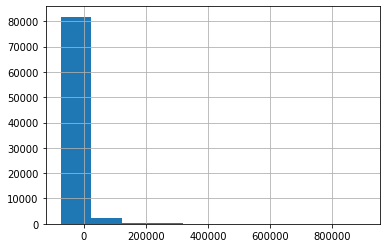

In [17]:
from matplotlib import pyplot as plt

train.new_cases.hist()

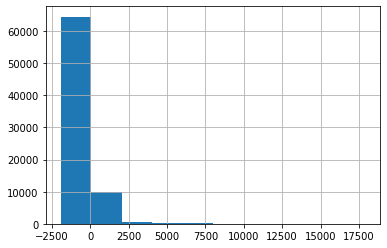

In [18]:
train.new_deaths.hist()

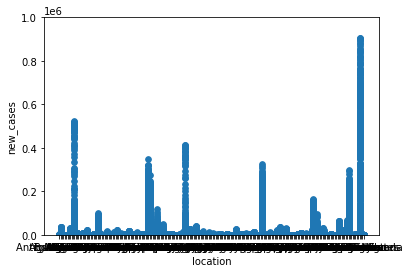

In [19]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,1000000), s=32);

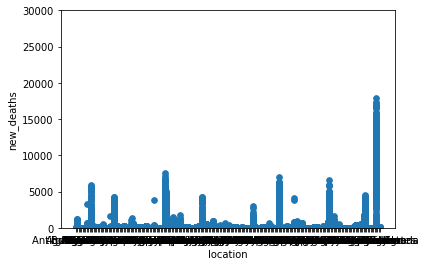

In [20]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,30000), s=32);

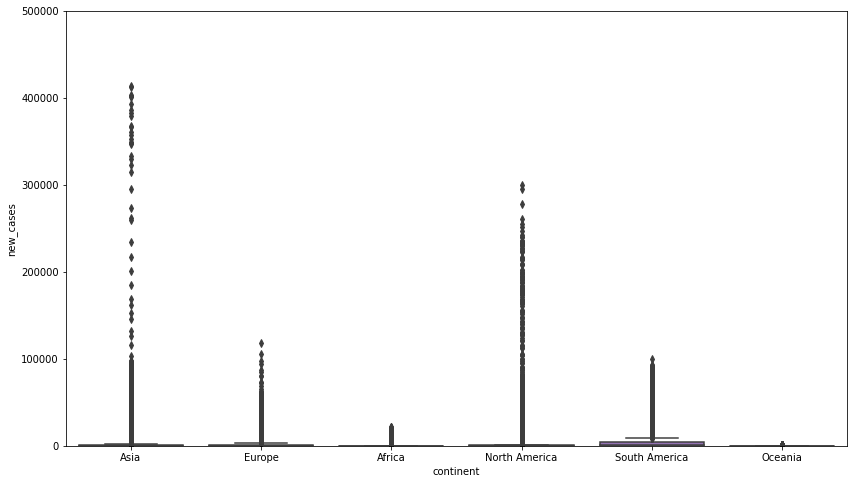

In [21]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

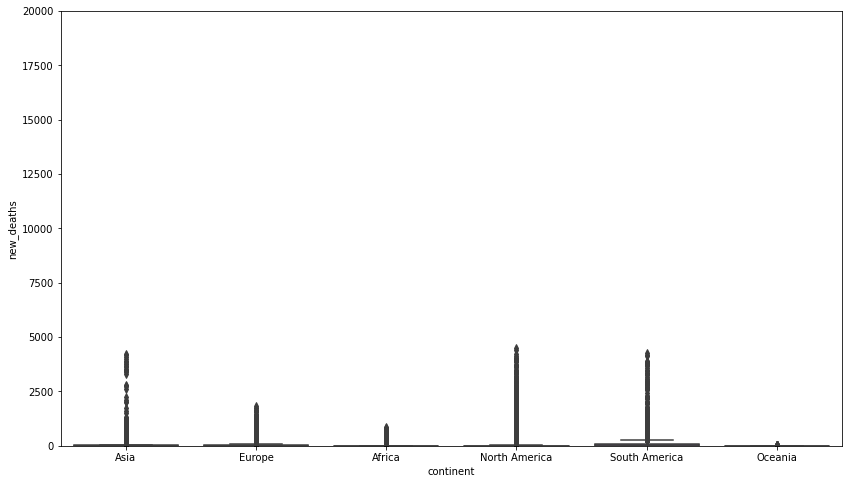

In [22]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

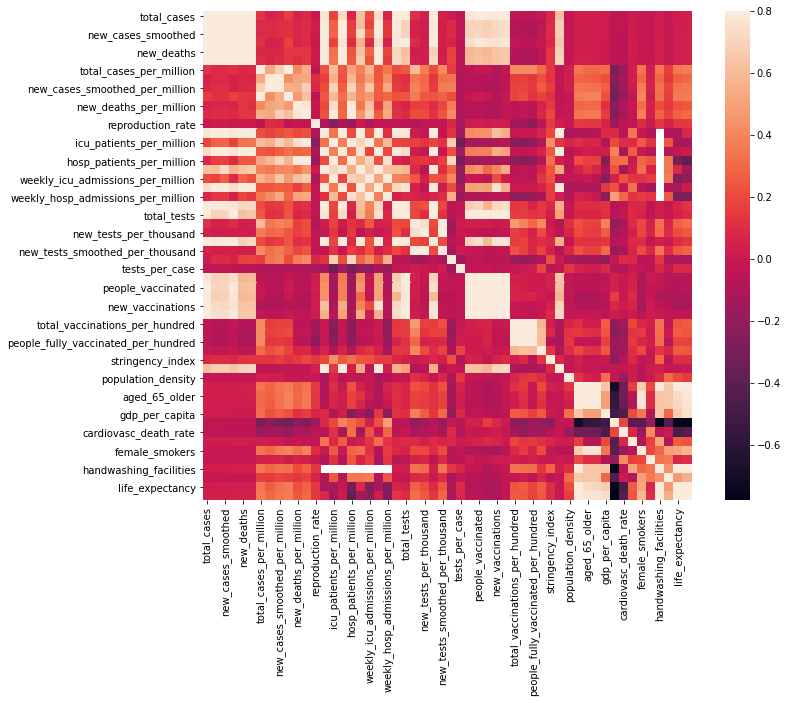

In [23]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [24]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
82676,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020
82677,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020
82678,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020
82679,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020
82680,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83138,GBR,Europe,United Kingdom,2021-05-07,4446752.0,2490.0,2072.286,127858.0,15.0,11.857,65503.222,36.679,30.526,1883.422,0.221,0.175,1.0,159.0,2.342,1153.0,16.984,NaN,NaN,NaN,NaN,708935.0,160342371.0,2361.936,10.443,978636.0,14.416,0.002,472.2,tests performed,52433184.0,35202642.0,17230542.0,598823.0,444809.0,77.24,51.86,25.38,6552.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,07052021
83139,GBR,Europe,United Kingdom,2021-05-08,4448808.0,2056.0,2093.000,127863.0,5.0,11.571,65533.508,30.286,30.831,1883.496,0.074,0.170,1.0,150.0,2.210,1130.0,16.646,NaN,NaN,NaN,NaN,490546.0,160869162.0,2369.696,7.226,979597.0,14.430,0.002,468.0,tests performed,53041048.0,35371669.0,17669379.0,607864.0,458007.0,78.13,52.10,26.03,6747.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,08052021
83140,GBR,Europe,United Kingdom,2021-05-09,4450578.0,1770.0,2106.714,127865.0,2.0,9.857,65559.581,26.073,31.033,1883.525,

Text(0, 0.5, 'uk_new_cases_per_million')

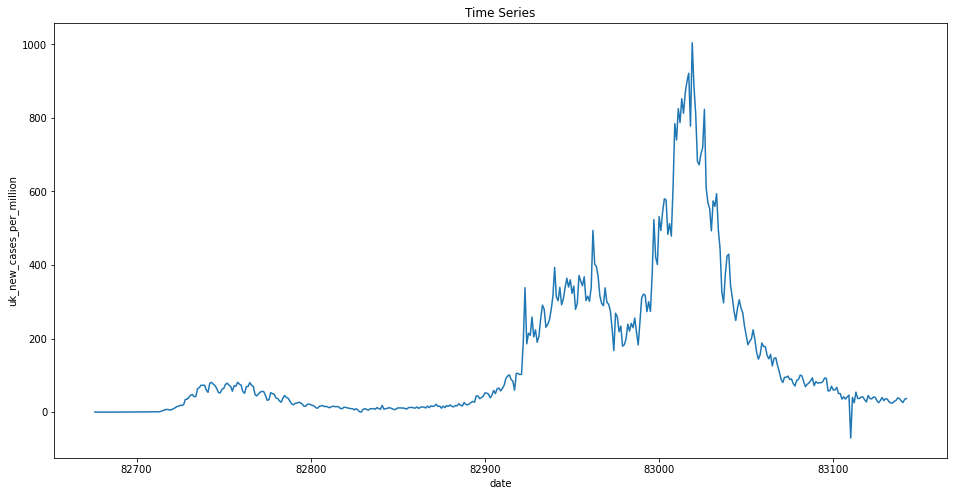

In [25]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

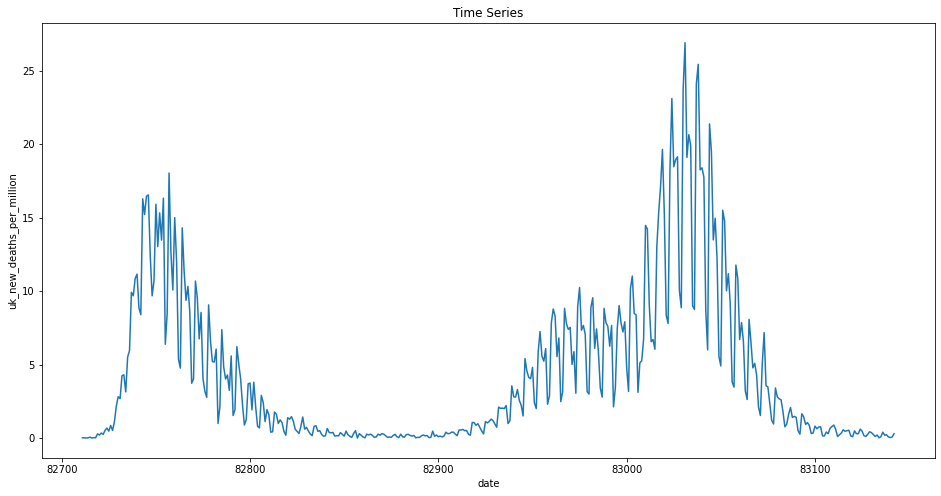

In [26]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [27]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
83143,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,22012020
83144,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,23012020
83145,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,24012020
83146,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,25012020
83147,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83614,USA,North America,United States,2021-05-07,32652472.0,47289.0,43643.000,580901.0,753.0,671.857,98647.163,142.866,131.851,1754.974,2.275,2.030,0.83,8624.0,26.054,31834.0,96.174,NaN,NaN,NaN,NaN,723019.0,426539890.0,1288.63,2.184,864103.0,2.611,0.05,20.0,tests performed,254779333.0,150416559.0,110874920.0,2805581.0,2088522.0,76.18,44.98,33.15,6245.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,07052021
83615,USA,North America,United States,2021-05-08,32686965.0,34493.0,42098.714,581516.0,615.0,659.143,98751.370,104.208,127.185,1756.832,1.858,1.991,0.82,8607.0,26.003,31781.0,96.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257347205.0,151315505.0,112626771.0,2567872.0,1983391.0,76.95,45.24,33.68,5930.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,08052021
83616,USA,North America,United States,2021-05-09,32708357.0,21392.0,40959.429,581754.0,238.0,646.8

Text(0, 0.5, 'us_new_cases_per_million')

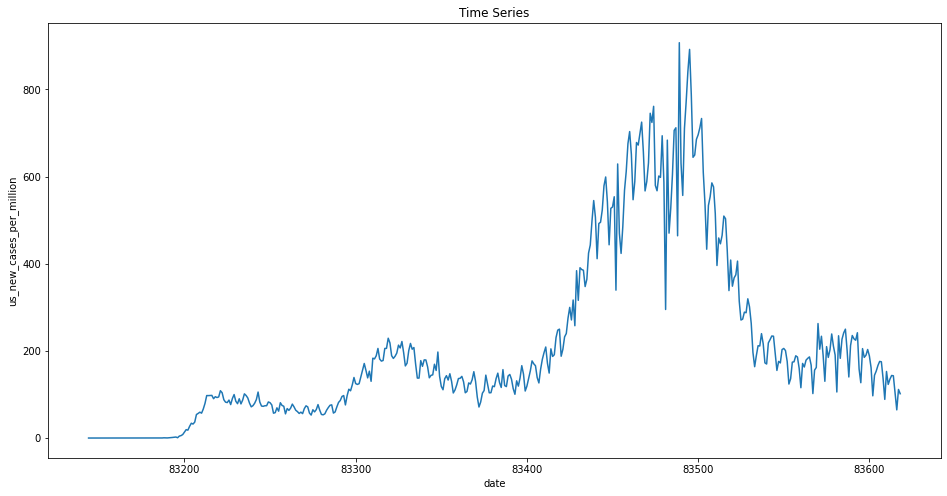

In [28]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

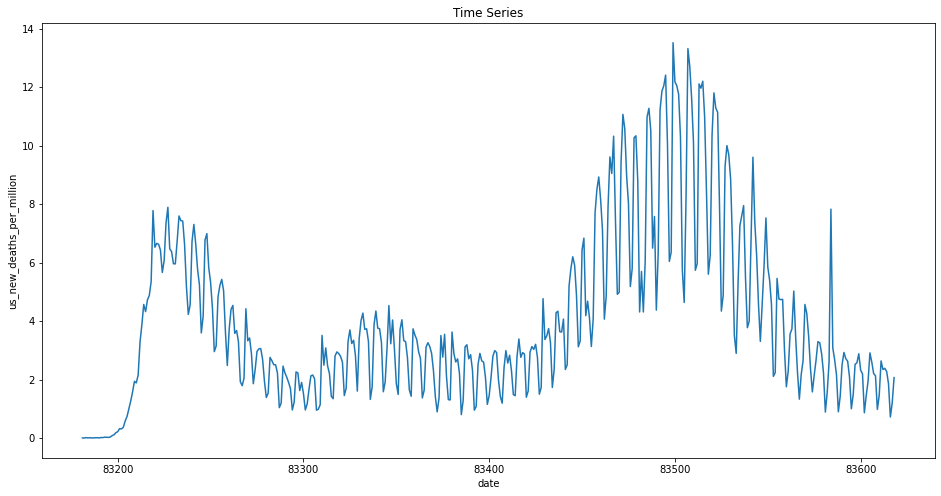

In [29]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

France

In [30]:
country = "France"

include_fr = train[train['location'].values == country] 
exclude_fr = train[train['location'].values != country]
fr_cov19 = include_fr
fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
28592,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,24012020
28593,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,0.044,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,25012020
28594,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,26012020
28595,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,27012020
28596,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,0.059,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29061,FRA,Europe,France,2021-05-07,5808421.0,19138.0,18655.143,106262.0,251.0,226.714,85968.851,283.256,276.110,1572.755,3.715,3.356,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500448.0,NaN,NaN,7.344,332449.0,4.878,0.054,18.5,people tested,25196861.0,17542317.0,7764439.0,616260.0,438794.0,37.29,25.96,11.49,6494.0,63.89,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,07052021
29062,FRA,Europe,France,2021-05-08,5829166.0,20745.0,17951.571,106438.0,176.0,224.429,86275.892,307.041,265.696,1575.360,2.605,3.322,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25448331.0,17726841.0,7833539.0,251470.0,444570.0,37.67,26.24,11.59,6580.0,NaN,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,08052021
29063,FRA,Europe,France,2021-05-09,5838294.0,9128.0,17843.000,106553.0,115.0,224.714,86410.993,135.101,264.089,1577.062,1.702,3.326,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25621942.0,17853667.0,7880929.0,173611.0,451259.0,37.92,26

Text(0, 0.5, 'france_new_cases_per_million')

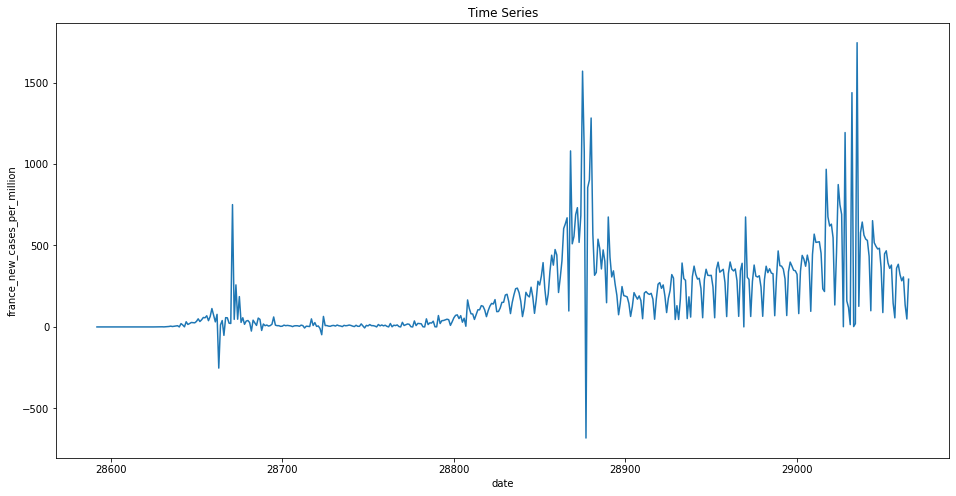

In [31]:
fr_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_cases_per_million")

Text(0, 0.5, 'france_new_deaths_per_million')

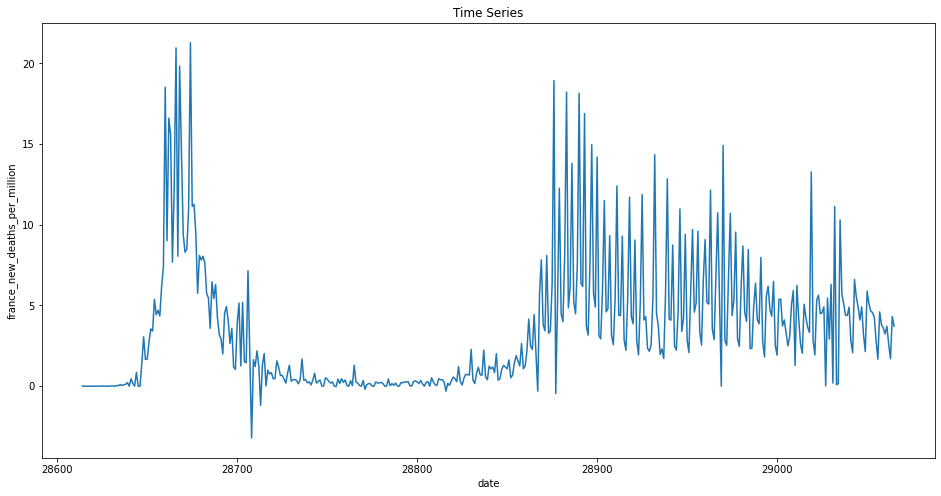

In [32]:
fr_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_deaths_per_million")

Italy

In [33]:
country = "Italy"

include_it = train[train['location'].values == country] 
exclude_it = train[train['location'].values != country]
it_cov19 = include_it
it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
39356,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,31012020
39357,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01022020
39358,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02022020
39359,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03022020
39360,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39818,ITA,Europe,Italy,2021-05-07,4092747.0,10549.0,10013.429,122470.0,207.0,237.571,67691.420,174.474,165.616,2025.576,3.424,3.929,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328612.0,60532582.0,1001.170,5.435,278976.0,4.614,0.036,27.9,tests performed,23210717.0,16271652.0,7089532.0,533140.0,453090.0,38.39,26.91,11.73,7494.0,75.00,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,07052021
39819,ITA,Europe,Italy,2021-05-08,4102921.0,10174.0,9614.857,122694.0,224.0,237.286,67859.692,168.271,159.024,2029.280,3.705,3.925,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338436.0,60871018.0,1006.768,5.598,273295.0,4.520,0.035,28.4,tests performed,23712195.0,16591143.0,7286161.0,501478.0,463219.0,39.22,27.44,12.05,7661.0,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,08052021
39820,ITA,Europe,Italy,2021-05-09,4111210.0,8289.0,9492.571,122833.0,139.0,236.571,67996.786,137.095,157.001,2031.579,2.299,3.913,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226006.0,61097024.0,1010.506,3.738,28

Text(0, 0.5, 'italy_new_cases_per_million')

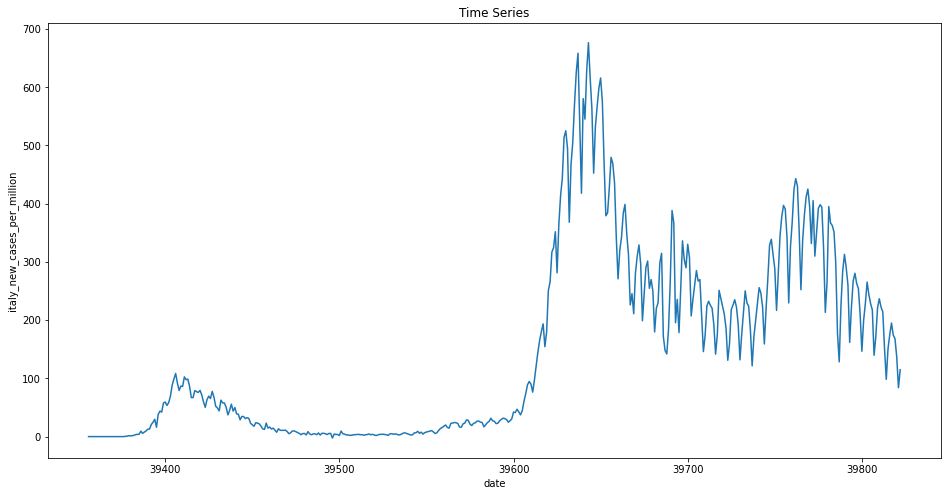

In [34]:
it_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_cases_per_million")

Text(0, 0.5, 'italy_new_deaths_per_million')

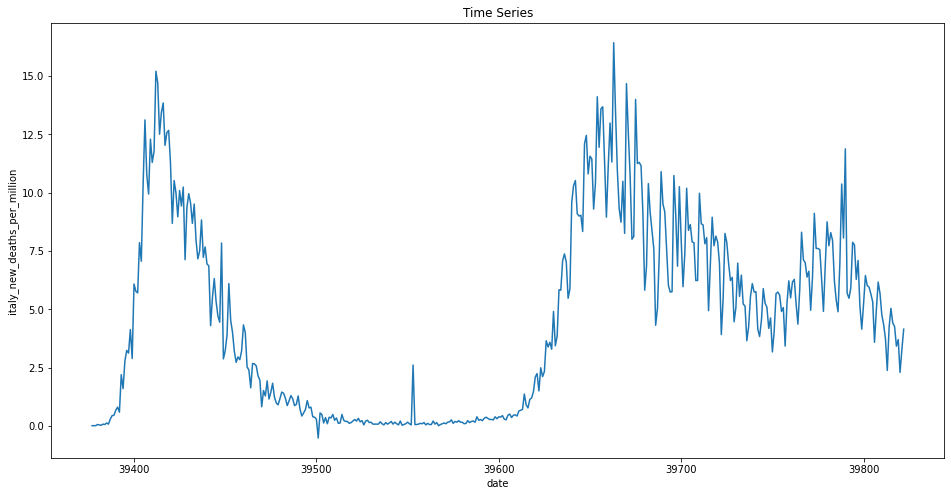

In [35]:
it_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_deaths_per_million")

Brazil

In [36]:
country = "Brazil"

include_br = train[train['location'].values == country] 
exclude_br = train[train['location'].values != country]
br_cov19 = include_br
br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
11216,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,26022020
11217,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,27022020
11218,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
11219,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
11220,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11652,BRA,South America,Brazil,2021-05-07,15082449.0,78886.0,60491.143,419114.0,2165.0,2190.429,70956.393,371.124,284.585,1971.750,10.185,10.305,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46875460.0,31722544.0,15152916.0,333068.0,596657.0,22.05,14.92,7.13,2807.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,07052021
11653,BRA,South America,Brazil,2021-05-08,15145879.0,63430.0,59986.286,421316.0,2202.0,2125.571,71254.804,298.411,282.210,1982.109,10.359,10.000,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571797.0,NaN,NaN,NaN,2690.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,08052021
11654,BRA,South America,Brazil,2021-05-09,15184790.0,38911.0,61411.429,422340.0,1024.0,2100.143,71437.863,183.059,288.914,1986.927,4.817,9.880,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575528.0,NaN,NaN,NaN,2708.0,NaN,212559409.0,25.04,33.

Text(0, 0.5, 'brazil_new_cases_per_million')

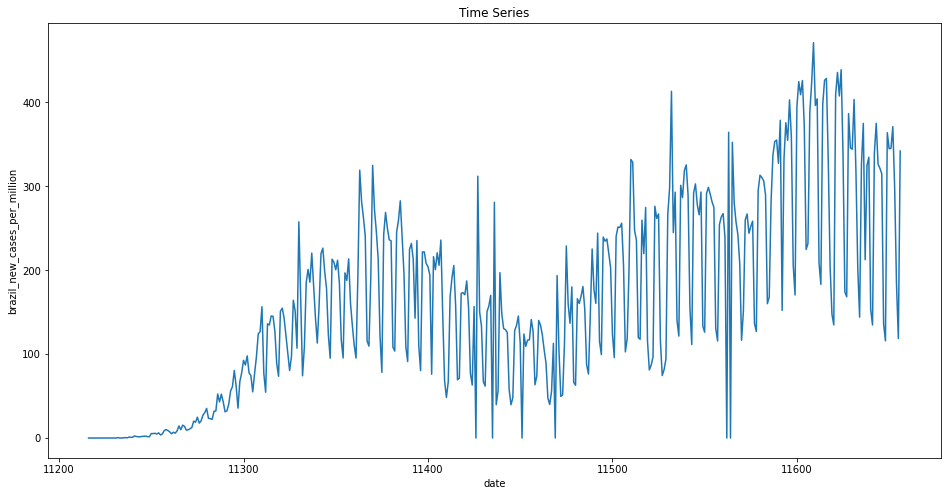

In [37]:
br_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_cases_per_million")

Text(0, 0.5, 'brazil_new_deaths_per_million')

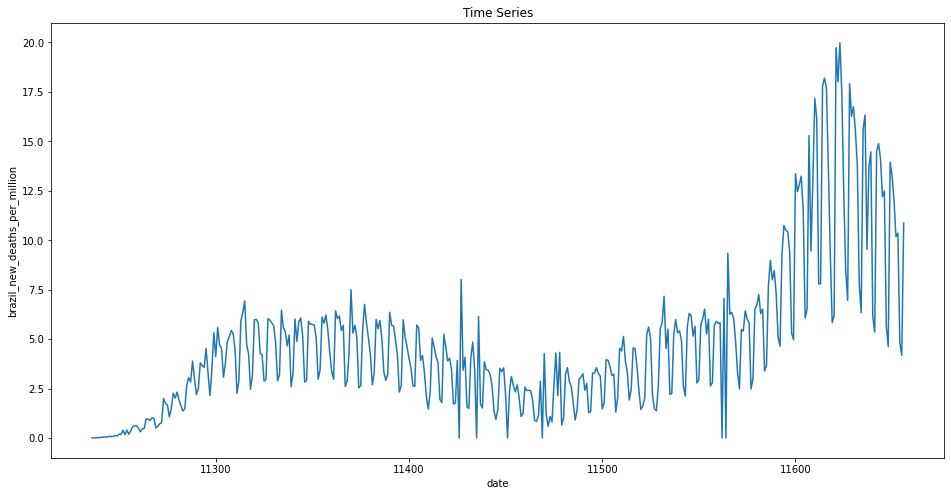

In [38]:
br_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_deaths_per_million")

Portugal

In [39]:
country = "Portugal"

include_p = train[train['location'].values == country]
exclude_p = train[train['location'].values != country]
p_cov19 = include_p
p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
63728,PRT,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02022020
63729,PRT,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,09022020
63730,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
63731,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
63732,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64164,PRT,Europe,Portugal,2021-05-07,838852.0,377.0,337.000,16989.0,1.0,2.143,82266.951,36.973,33.050,1666.126,0.098,0.210,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46587.0,10885426.0,1067.543,4.569,42492.0,4.167,0.008,126.1,tests performed,3817745.0,2777426.0,1040297.0,101024.0,73182.0,37.44,27.24,10.20,7177.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,07052021
64165,PRT,Europe,Portugal,2021-05-08,839258.0,406.0,330.143,16991.0,2.0,2.143,82306.768,39.817,32.377,1666.322,0.196,0.210,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31421.0,10916847.0,1070.625,3.081,42488.0,4.167,0.008,128.7,tests performed,3921995.0,2824858.0,1097115.0,104250.0,75746.0,38.46,27.70,10.76,7428.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,08052021
64166,PRT,Europe,Portugal,2021-05-09,839582.0,324.0,329.286,16992.0,1.0,2.143,82338.543,31.775,32.293,1666.420,0.098,0.210,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Text(0, 0.5, 'portugal_new_cases_per_million')

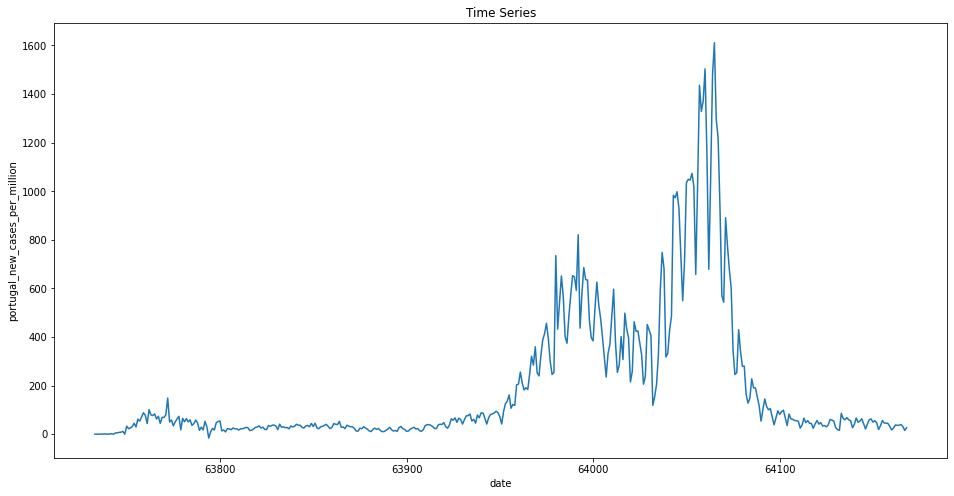

In [40]:
p_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_cases_per_million")

Text(0, 0.5, 'portugal_new_deaths_per_million')

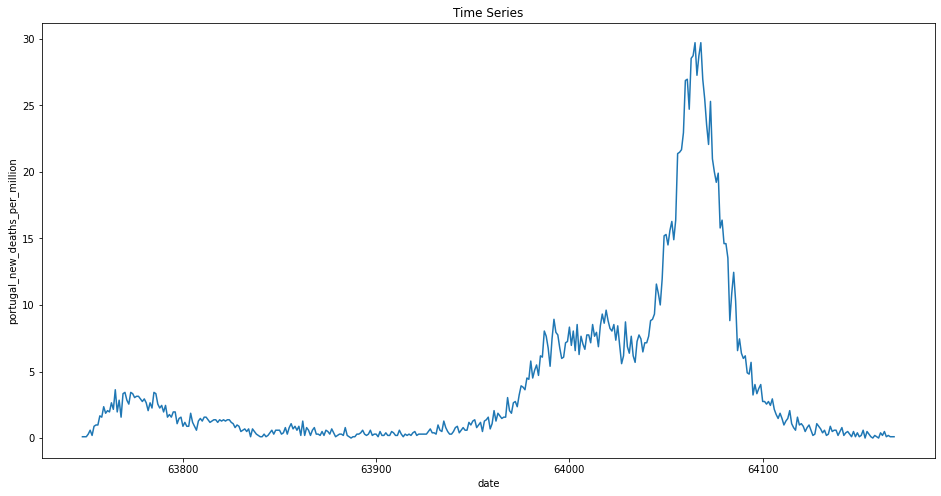

In [41]:
p_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_deaths_per_million")

Spain

In [42]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74219,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01022020
74220,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,17.78,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02022020
74221,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03022020
74222,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04022020
74223,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74680,ESP,Europe,Spain,2021-05-07,3567408.0,8186.0,6190.143,78792.0,66.0,82.286,76300.386,175.084,132.396,1685.218,1.412,1.760,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381863.0,NaN,NaN,NaN,8167.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,07052021
74681,ESP,Europe,Spain,2021-05-08,3567408.0,0.0,6190.143,78792.0,0.0,82.286,76300.386,0.000,132.396,1685.218,0.000,1.760,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380364.0,NaN,NaN,NaN,8135.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,08052021
74682,ESP,Europe,Spain,2021-05-09,3567408.0,0.0,6190.143,78792.0,0.0,82.286,76300.386,0.000,132.396,1685.218,0.000,1.760,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19830624.0,13797431.0,6221476.0,NaN,378865.0,42.41,29.51,13.31,8103.0,62.96,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,09052

Text(0, 0.5, 'spain_new_cases_per_million')

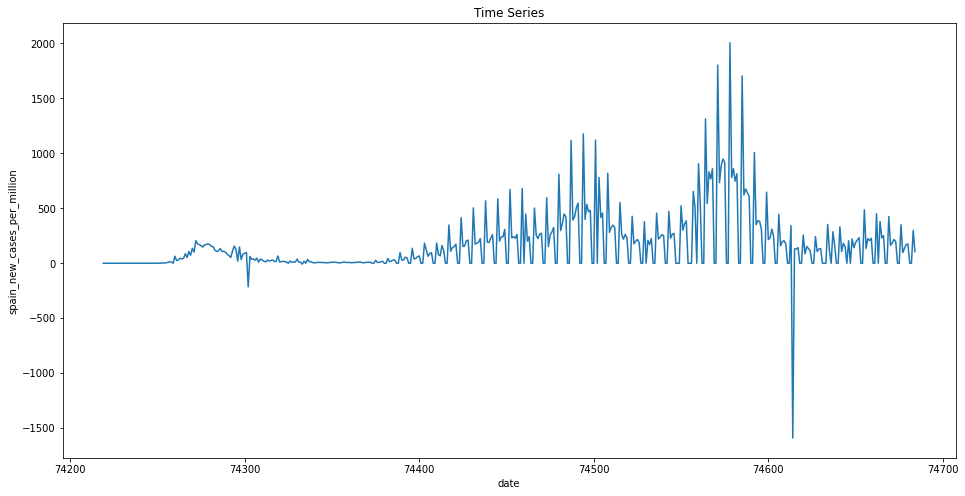

In [43]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

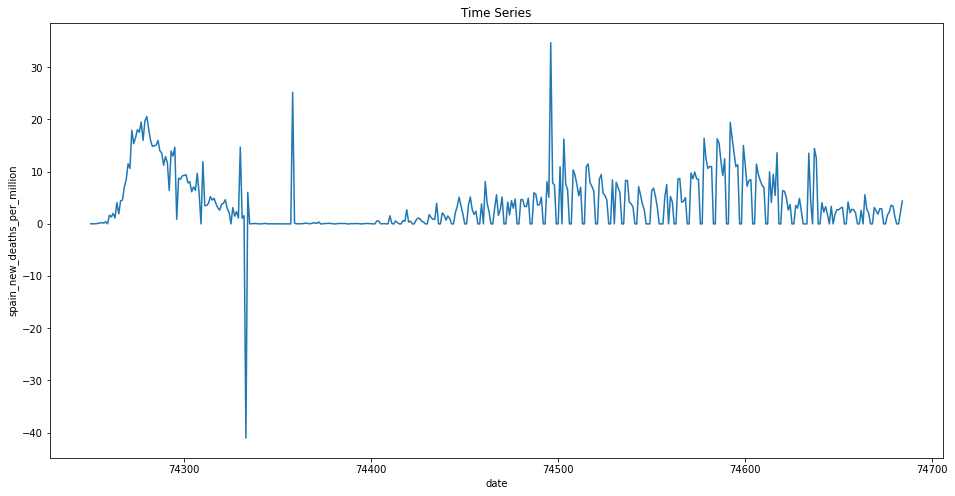

In [44]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [45]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
36100,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020
36101,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020
36102,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020
36103,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020
36104,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36563,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,15864.208,290.635,282.370,172.659,3.034,2.735,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1826490.0,298601699.0,216.377,1.324,1744230.0,1.264,0.223,4.5,samples tested,165190000.0,132294827.0,32895173.0,2586397.0,1884556.0,11.97,9.59,2.38,1366.0,73.61,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,07052021
36564,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,16156.529,292.322,283.501,175.613,2.954,2.775,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808344.0,300410043.0,217.688,1.310,1724665.0,1.250,0.227,4.4,samples tested,167493857.0,133366482.0,34127375.0,2303857.0,1981076.0,12.14,9.66,2.47,1436.0,73.61,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,08052021
36565,IND,Asia,India,2021-05-09,22662575.0,366494.0,391008.286,246116.0,3769.0,3879.571,16422.104,265.575,283.338,178.344,2.731,2.811,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1865428.0,302275

Text(0, 0.5, 'us_new_cases_per_million')

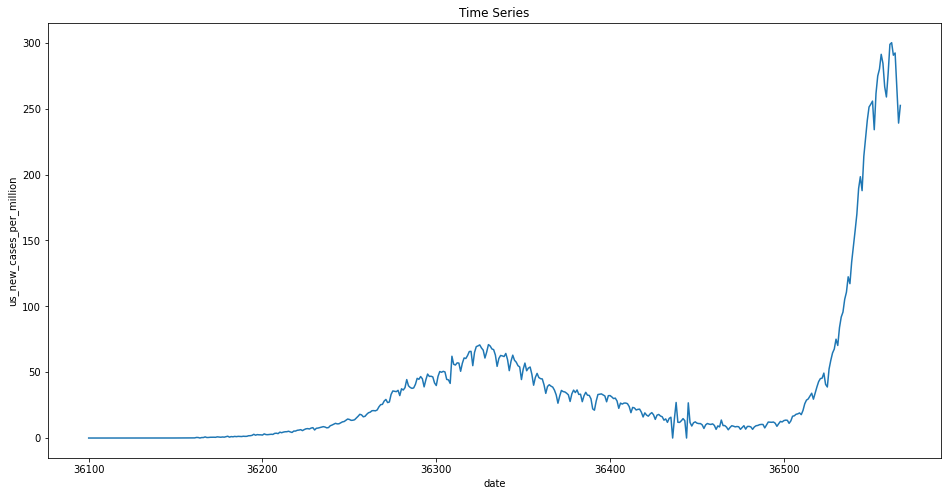

In [46]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

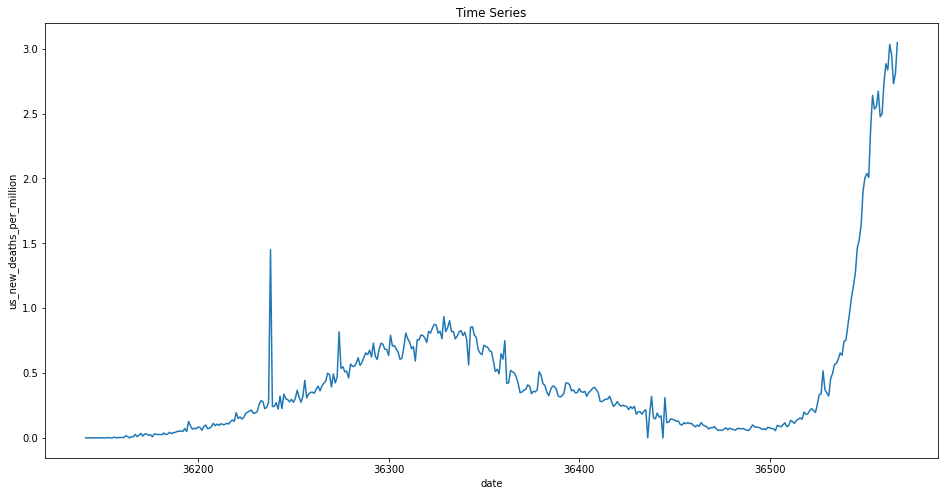

In [47]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [48]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
16563,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,22012020
16564,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,23012020
16565,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,24012020
16566,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,25012020
16567,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17034,CHN,Asia,China,2021-05-07,102596.0,10.0,14.571,4846.0,0.0,0.143,71.281,0.007,0.010,3.367,0.000,0.0,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308226000.0,NaN,NaN,10492000.0,6166000.0,21.41,NaN,NaN,4284.0,63.43,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,07052021
17035,CHN,Asia,China,2021-05-08,102613.0,17.0,13.714,4846.0,0.0,0.000,71.293,0.012,0.010,3.367,0.000,0.0,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317586000.0,NaN,NaN,9360000.0,6740000.0,22.06,NaN,NaN,4683.0,63.43,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,08052021
17036,CHN,Asia,China,2021-05-09,102625.0,12.0,13.571,4846.0,0.0,0.000,71.301,0.008,0.009,3.367,0.000,0.0,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324307000.0,NaN,NaN,6721000.0,6995571.0,22.53,NaN,NaN,4860.0,63.43,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,N

Text(0, 0.5, 'china_new_cases_per_million')

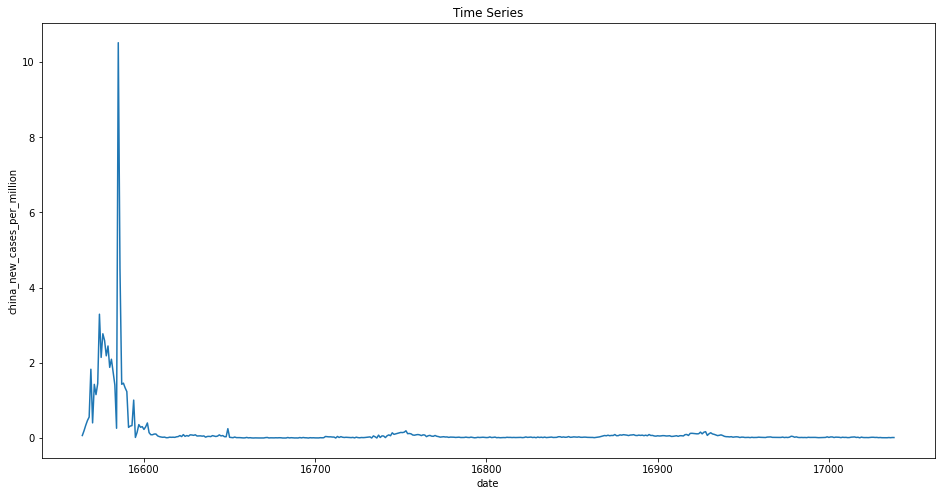

In [49]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

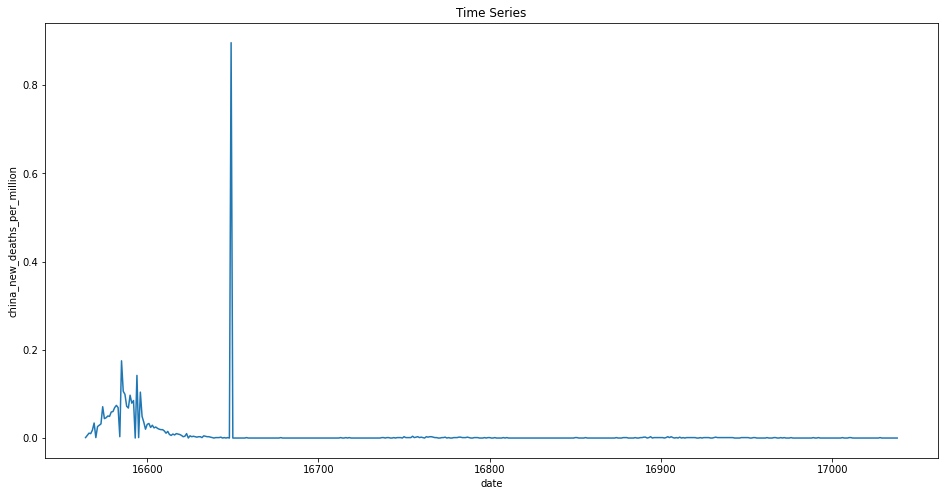

In [50]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [51]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
77330,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
77331,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
77332,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
77333,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
77334,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77807,TWN,Asia,Taiwan,2021-05-07,1178.0,5.0,7.143,12.0,0.0,0.0,49.461,0.210,0.300,0.504,0.0,0.0,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1069.0,214706.0,9.015,0.045,910.0,0.038,0.008,127.4,people tested,91002.0,NaN,NaN,10141.0,4731.0,0.38,NaN,NaN,199.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,07052021
77808,TWN,Asia,Taiwan,2021-05-08,1183.0,5.0,7.286,12.0,0.0,0.0,49.671,0.210,0.306,0.504,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0,215119.0,9.032,0.017,914.0,0.038,0.008,125.4,people tested,NaN,NaN,NaN,NaN,4780.0,NaN,NaN,NaN,201.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,08052021
77809,TWN,Asia,Taiwan,2021-05-09,1184.0,1.0,6.714,12.0,0.0,0.0,49.713,0.042,0.282,0.504,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.0,215804.0,9.061,0.029,952.0,0.040,0.007,141.8,people tested,92049.0,NaN,NaN,NaN,4828.0,0.39,NaN,NaN,203.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,09052021
77810,TWN,Asia,Taiwan,2021-05-10,1199.0,15.0,7.714,12.0,0.0,0.0,50.343,0.630,0.324,0.504,0.0,0.0,NaN,NaN,NaN,NaN,NaN

Text(0, 0.5, 'taiwan_new_cases_per_million')

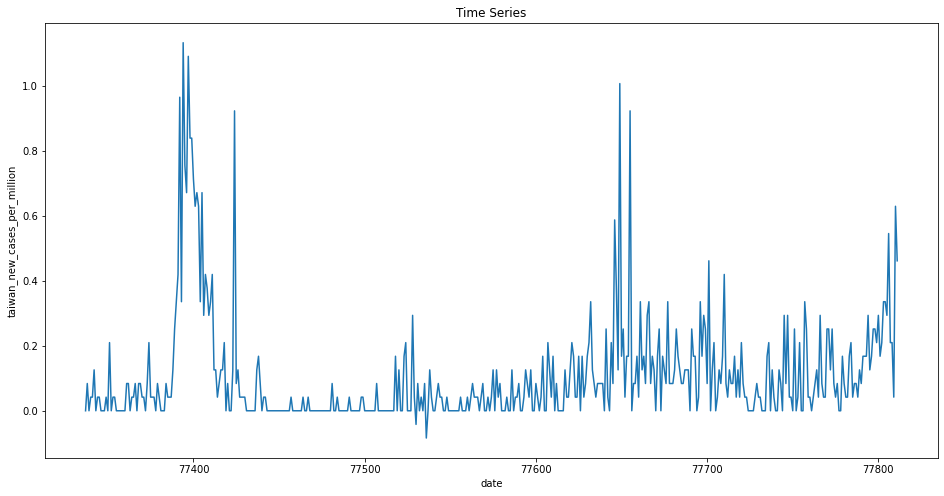

In [52]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

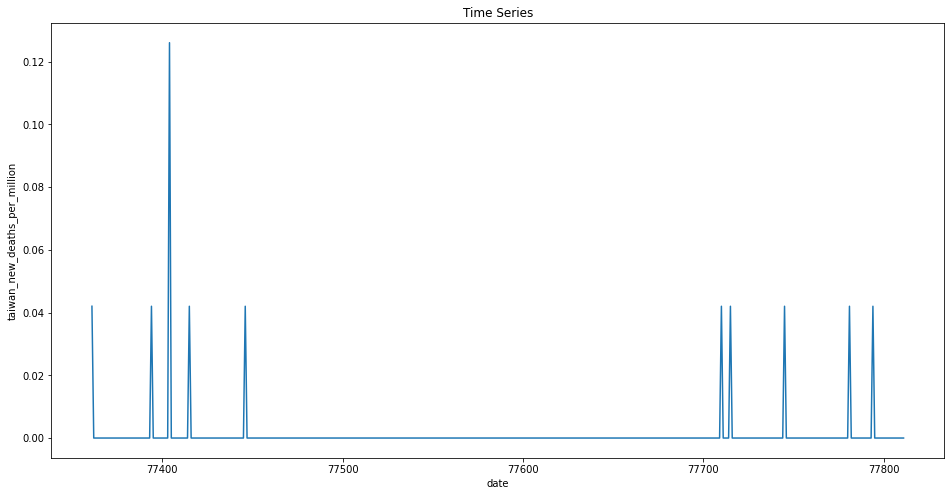

In [53]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [54]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
40250,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,22012020
40251,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,23012020
40252,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,24012020
40253,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,25012020
40254,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40721,JPN,Asia,Japan,2021-05-07,628319.0,6046.0,5007.857,10712.0,146.0,73.286,4967.873,47.803,39.595,84.696,1.154,0.579,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109758.0,11662329.0,92.209,0.868,63272.0,0.500,0.079,12.6,people tested,NaN,NaN,NaN,NaN,104216.0,NaN,NaN,NaN,824.0,49.07,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,07052021
40722,JPN,Asia,Japan,2021-05-08,635568.0,7249.0,5187.857,10796.0,84.0,73.571,5025.188,57.315,41.018,85.360,0.664,0.582,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71001.0,11733330.0,92.771,0.561,63654.0,0.503,0.082,12.3,people tested,NaN,NaN,NaN,NaN,107325.0,NaN,NaN,NaN,849.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,08052021
40723,JPN,Asia,Japan,2021-05-09,642146.0,6578.0,5285.143,10860.0,64.0,74.000,5077.198,52.010,41.788,85.866,0.506,0.585,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41338.0,11774668.0,93.098,0.327,64386.0,0.509,0.082,12.2,people tested,4436325.0,3277886.0,1158439.0,NaN,110435.0,3.51,2.59,0.92,873.0,NaN,126476458.0,347.77

Text(0, 0.5, 'japan_new_cases_per_million')

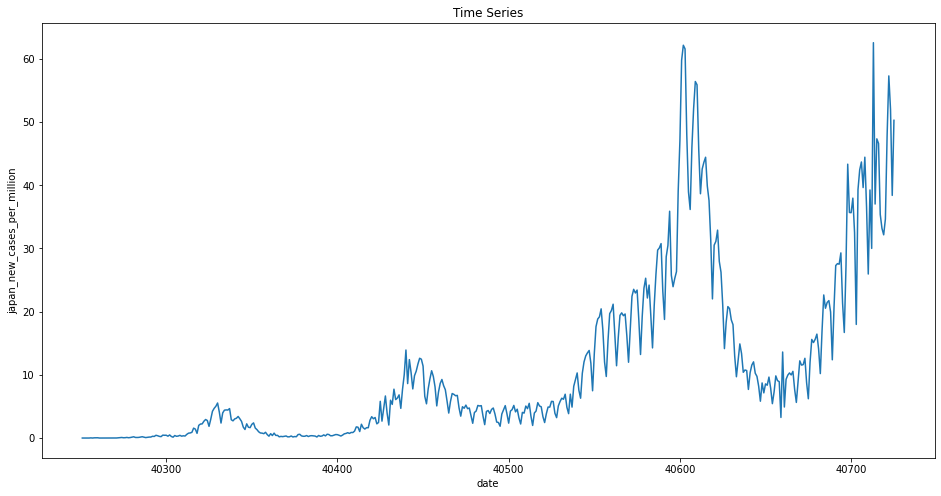

In [55]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

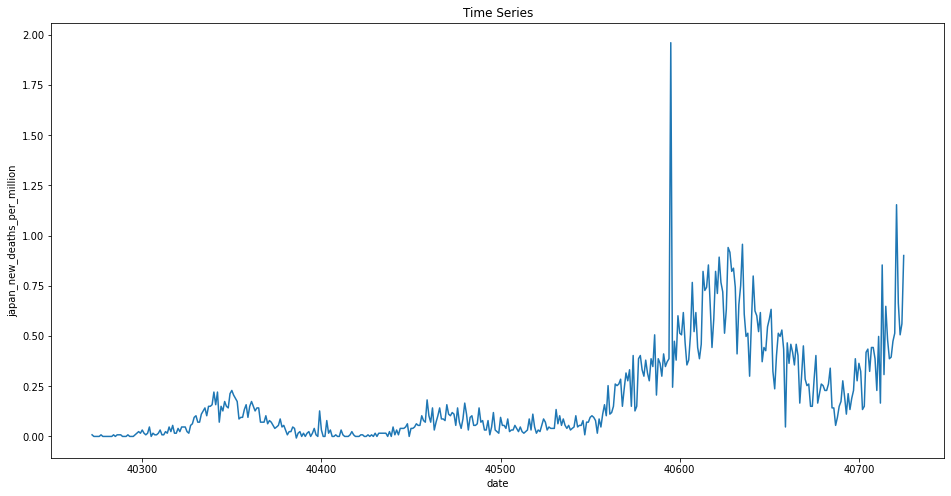

In [56]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [57]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
56073,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,28022020
56074,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,29022020
56075,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,01032020
56076,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02032020
56077,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56507,NZL,Oceania,New Zealand,2021-05-07,2634.0,0.0,3.000,26.0,0.0,0.0,546.220,0.000,0.622,5.392,0.0,0.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2046919.0,424.475,NaN,4011.0,0.832,0.001,1337.0,tests performed,352694.0,247328.0,105366.0,16622.0,11252.0,7.31,5.13,2.19,2333.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,07052021
56508,NZL,Oceania,New Zealand,2021-05-08,2642.0,8.0,3.429,26.0,0.0,0.0,547.879,1.659,0.711,5.392,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.0,2051603.0,425.447,0.971,4101.0,0.850,0.001,1196.0,tests performed,359330.0,251319.0,108011.0,6636.0,11427.0,7.45,5.21,2.24,2370.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,08052021
56509,NZL,Oceania,New Zealand,2021-05-09,2644.0,2.0,3.143,26.0,0.0,0.0,548.294,0.415,0.652,5.392,0.0,0.0,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3048.0,2054651.0,426.079,0.632,3958.0,0.821,0.001,1259.3,tests performed,362664

Text(0, 0.5, 'new_zealand_new_cases_per_million')

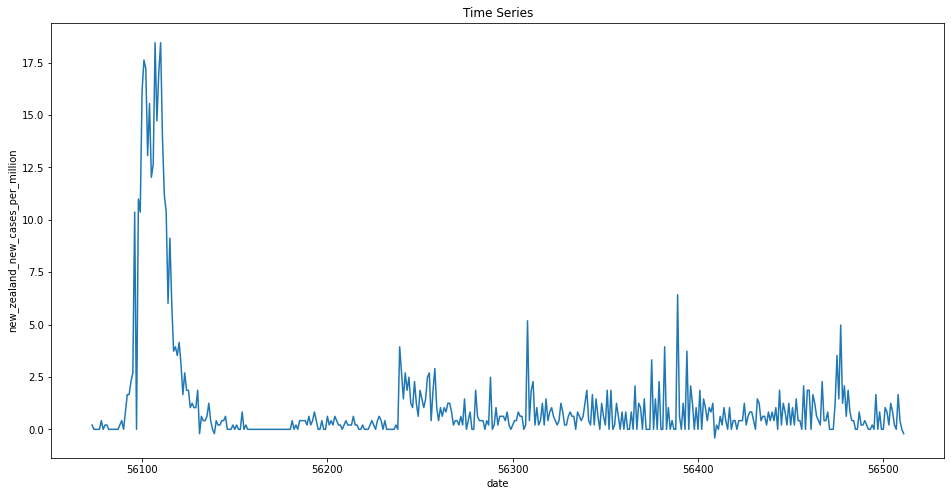

In [58]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

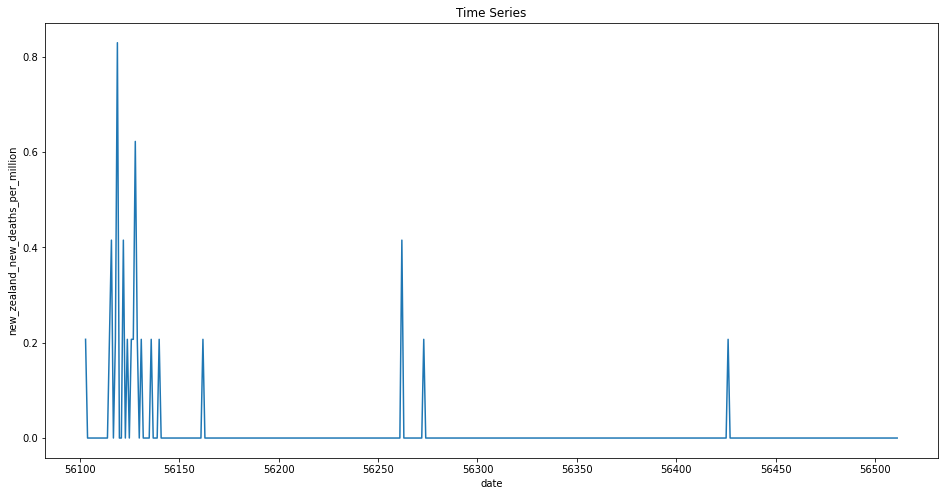

In [59]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [60]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4592,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,26012020
4593,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,27012020
4594,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28012020
4595,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29012020
4596,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,30012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,AUS,Oceania,Australia,2021-05-07,29906.0,13.0,13.571,910.0,0.0,0.0,1172.790,0.510,0.532,35.686,0.0,0.0,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42027.0,1.648,0.0,3096.8,tests performed,2554531.0,NaN,NaN,81002.0,53570.0,10.02,NaN,NaN,2101.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,07052021
5060,AUS,Oceania,Australia,2021-05-08,29922.0,16.0,14.000,910.0,0.0,0.0,1173.417,0.627,0.549,35.686,0.0,0.0,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43439.0,1.703,0.0,3102.8,tests performed,2627725.0,NaN,NaN,73194.0,56126.0,10.30,NaN,NaN,2201.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,08052021
5061,AUS,Oceania,Australia,2021-05-09,29931.0,9.0,13.286,910.0,0.0,0.0,1173.770,0.353,0.521,35.686,0.0,0.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17221109.0,675.341,NaN,44851.0,1.759,0.0,3375.8,tests performed,2654338.0,NaN,NaN,26613.0,57181.0,10.41,NaN,NaN,2242.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.7

Text(0, 0.5, 'australia_new_cases_per_million')

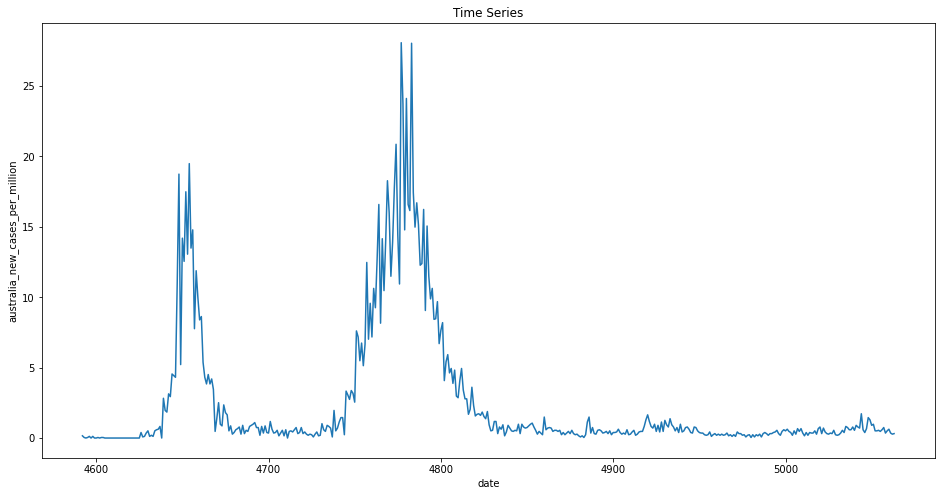

In [61]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

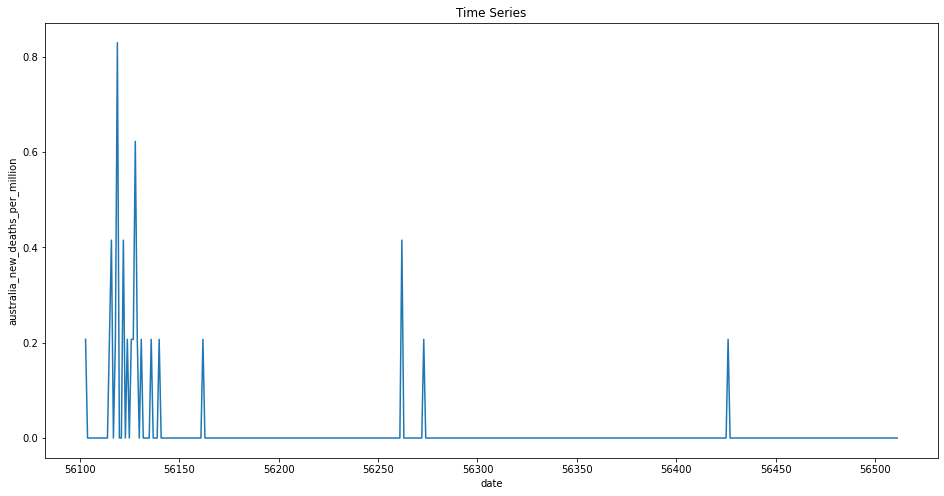

In [62]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [63]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
72435,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07022020
72436,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08022020
72437,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,09022020
72438,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,10022020
72439,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72890,ZAF,Africa,South Africa,2021-05-07,1592626.0,2256.0,1630.857,54687.0,67.0,48.143,26853.164,38.038,27.498,922.074,1.130,0.812,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25934.0,10831738.0,182.633,0.437,25267.0,0.426,0.065,15.5,people tested,381171.0,381171.0,381171.0,NaN,9074.0,0.64,0.64,0.64,153.0,43.52,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07052021
72891,ZAF,Africa,South Africa,2021-05-08,1592626.0,0.0,1397.714,54687.0,0.0,40.143,26853.164,0.000,23.567,922.074,0.000,0.677,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29873.0,10861611.0,183.137,0.504,25541.0,0.431,0.055,18.3,people tested,382480.0,382480.0,382480.0,1309.0,9116.0,0.64,0.64,0.64,154.0,43.52,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08052021
72892,ZAF,Africa,South Africa,2021-05-09,1596595.0,3969.0,1790.143,54735.0,48.0,45.429,26920.085,66.921,30.183,922.883,0.809,0.766,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26098.0,10887

Text(0, 0.5, 'sa_new_cases_per_million')

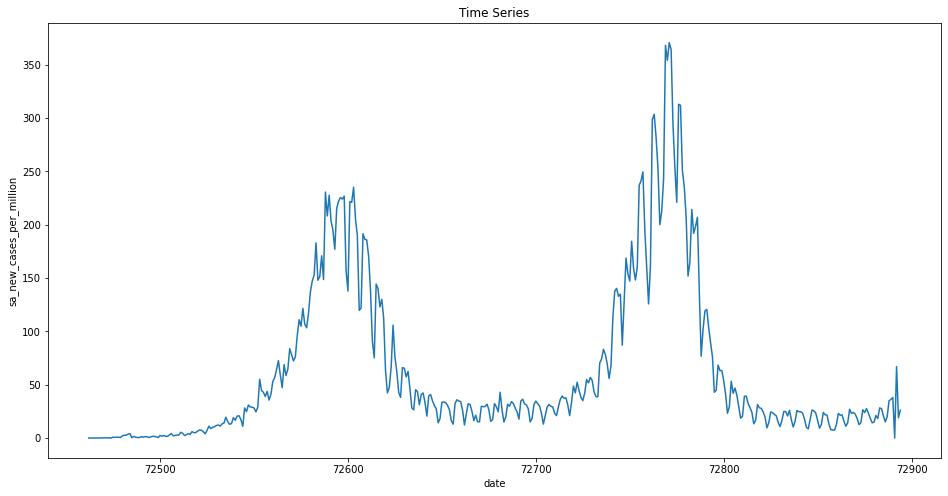

In [64]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

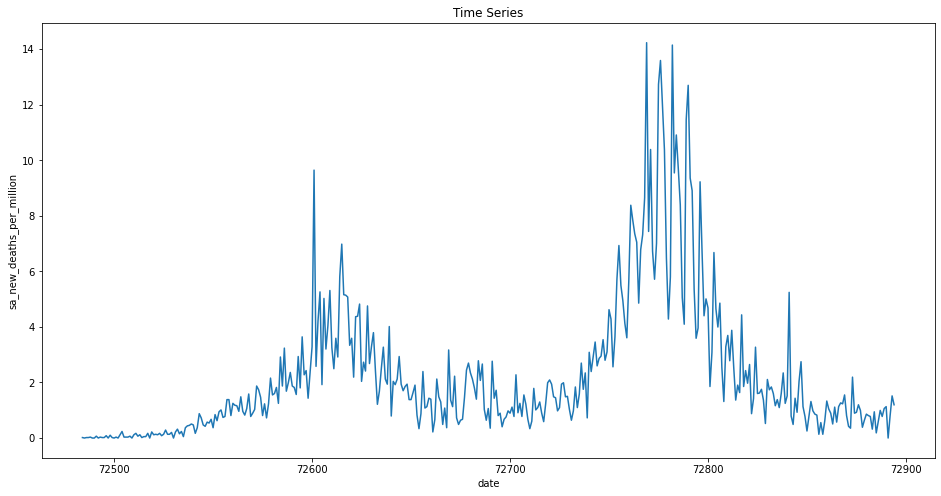

In [65]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [66]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
57349,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,28022020
57350,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,29022020
57351,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,01032020
57352,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,02032020
57353,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57783,NGA,Africa,Nigeria,2021-05-07,165340.0,39.0,32.857,2065.0,0.0,0.286,802.078,0.189,0.159,10.017,0.0,0.001,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4752.0,0.023,0.007,144.6,samples tested,1615787.0,1615787.0,NaN,326014.0,57694.0,0.78,0.78,NaN,280.0,47.22,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,07052021
57784,NGA,Africa,Nigeria,2021-05-08,165370.0,30.0,37.143,2065.0,0.0,0.286,802.223,0.146,0.180,10.017,0.0,0.001,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4993.0,0.024,0.007,134.4,samples tested,1653292.0,1653292.0,NaN,37505.0,61598.0,0.80,0.80,NaN,299.0,47.22,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,08052021
57785,NGA,Africa,Nigeria,2021-05-09,165419.0,49.0,38.000,2065.0,0.0,0.286,802.461,0.238,0.184,10.017,0.0,0.001,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5233.0,0.025,0.007,137.7,samples tested,1665698.0,1665698.0,NaN,12406.0,62281.0,0.81,0.81,NaN,302.0,47.22,206139587.0,209.588,18.1,2.751,1.4

Text(0, 0.5, 'n_new_cases_per_million')

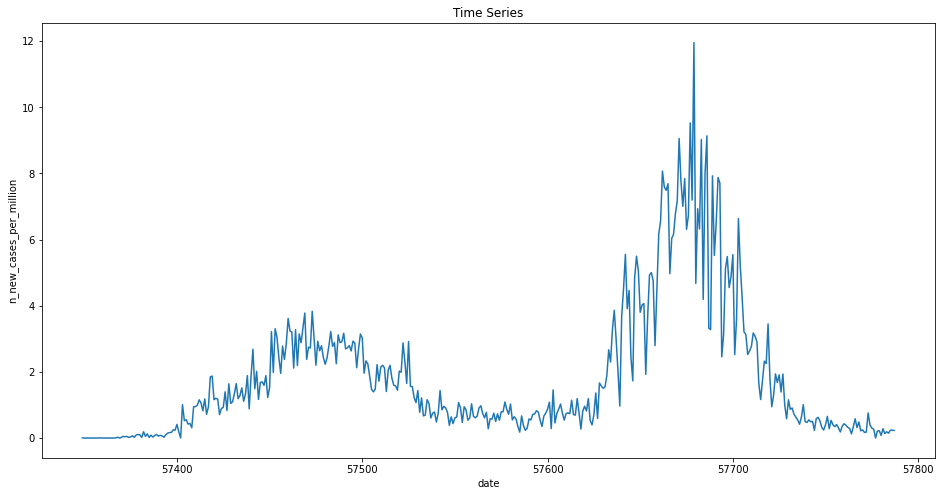

In [67]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

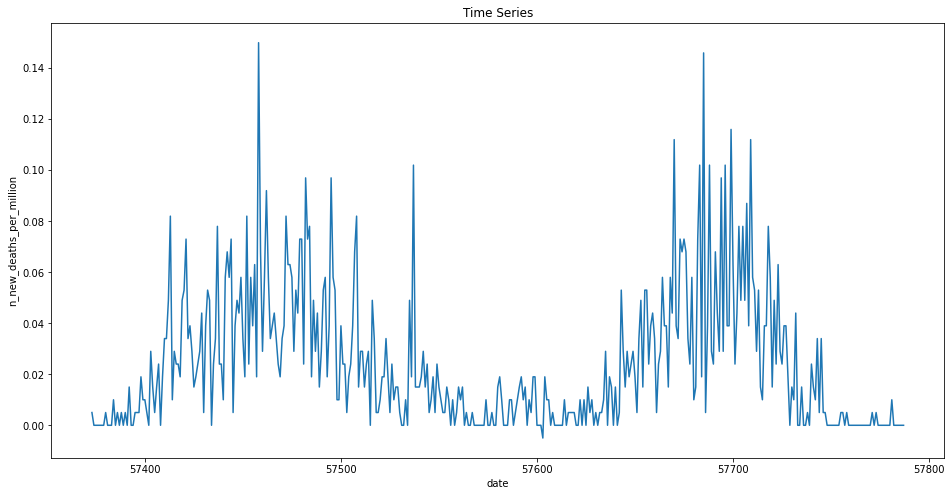

In [68]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [69]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
76006,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01022020
76007,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02022020
76008,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03022020
76009,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04022020
76010,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76467,SWE,Europe,Sweden,2021-05-07,1007792.0,5671.0,4884.000,14173.0,15.0,17.857,99788.599,561.526,483.599,1403.369,1.485,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3679451.0,2852689.0,826762.0,115842.0,44725.0,36.43,28.25,8.19,4429.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,07052021
76468,SWE,Europe,Sweden,2021-05-08,1007792.0,0.0,4884.000,14173.0,0.0,17.857,99788.599,0.000,483.599,1403.369,0.000,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45393.0,NaN,NaN,NaN,4495.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,08052021
76469,SWE,Europe,Sweden,2021-05-09,1007792.0,0.0,4884.000,14173.0,0.0,17.857,99788.599,0.000,483.599,1403.369,0.000,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46061.0,NaN,NaN,NaN,4561.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,0905202

Text(0, 0.5, 'sweden_new_cases_per_million')

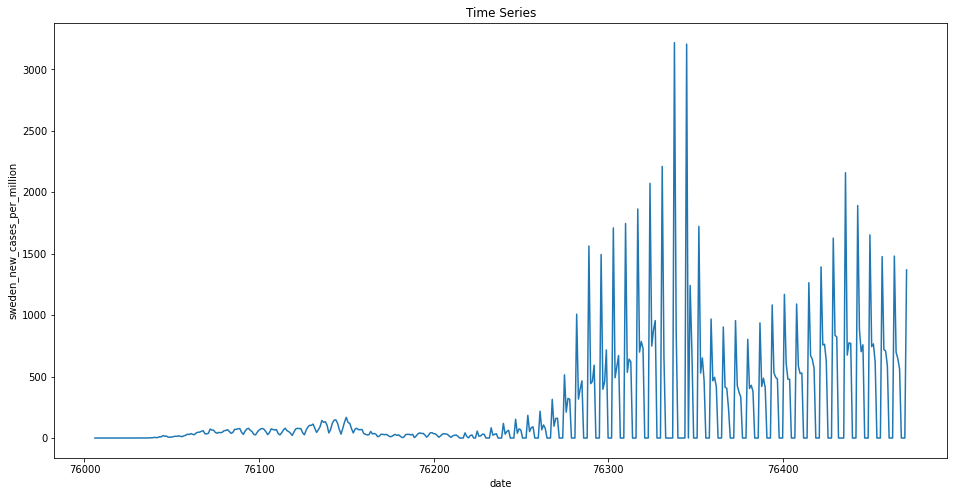

In [70]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

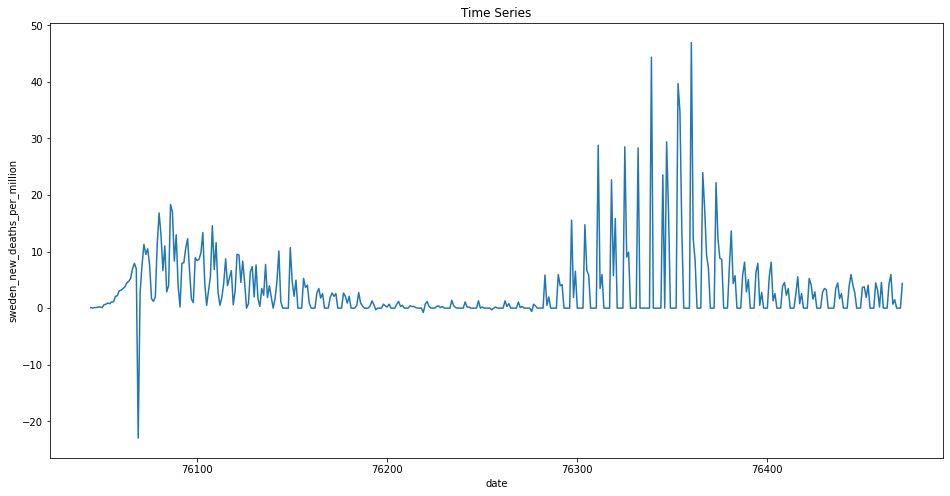

In [71]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [72]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
21337,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02022020
21338,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03022020
21339,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04022020
21340,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,05022020
21341,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,06022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,DNK,Europe,Denmark,2021-05-07,258204.0,1023.0,993.571,2496.0,2.0,1.714,44577.858,176.617,171.536,430.924,0.345,0.296,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2299112.0,1479690.0,819422.0,40969.0,43762.0,39.69,25.55,14.15,7555.0,53.7,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,07052021
21798,DNK,Europe,Denmark,2021-05-08,258881.0,677.0,877.286,2498.0,2.0,1.143,44694.739,116.881,151.460,431.269,0.345,0.197,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2339366.0,1489085.0,850281.0,40254.0,47601.0,40.39,25.71,14.68,8218.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,08052021
21799,DNK,Europe,Denmark,2021-05-09,259755.0,874.0,878.286,2498.0,0.0,1.000,44845.631,150.893,151.632,431.269,0.000,0.173,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2371969.0,1504980.0,866989.0,32603.0,47912.0,40.95,25.98,14.97,8272.0,NaN,5792203.0,136.52,42.3,19.677,12.32

Text(0, 0.5, 'denmark_new_cases_per_million')

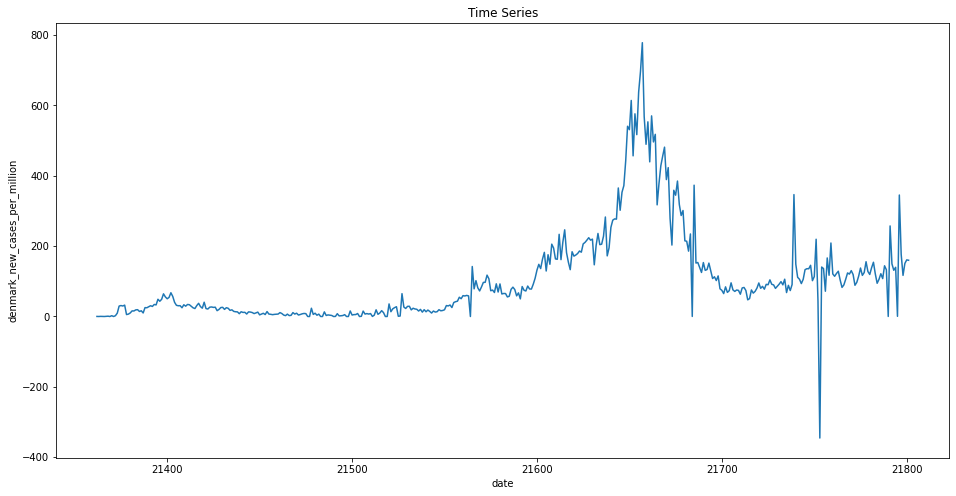

In [73]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

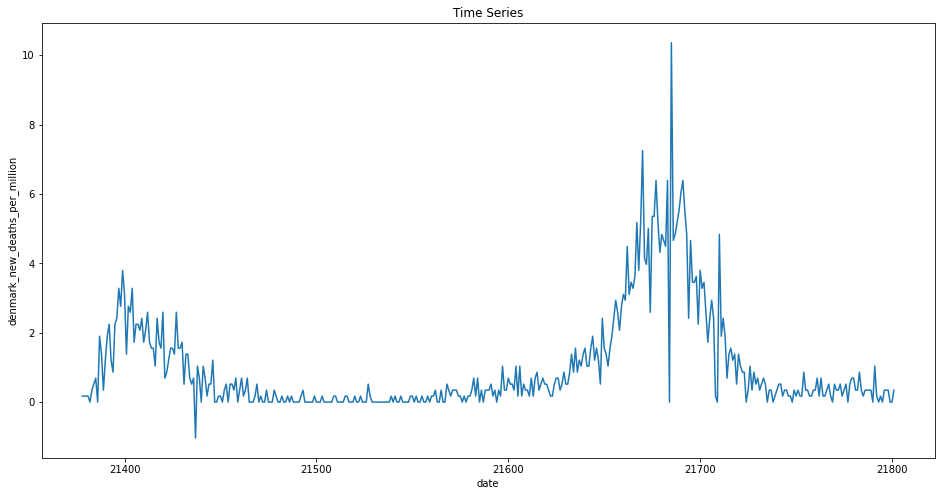

In [74]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

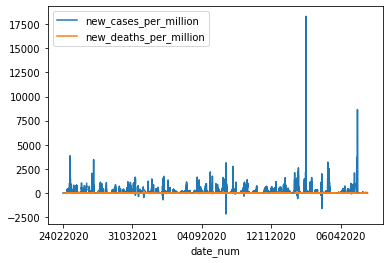

In [75]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

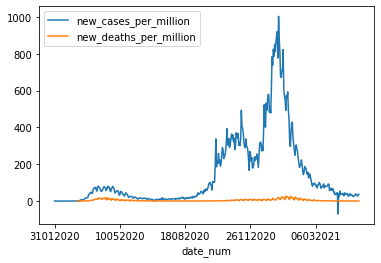

In [76]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [77]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
82704,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28022020
82705,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29022020
82706,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01032020
82707,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02032020
82708,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83138,GBR,Europe,United Kingdom,2021-05-07,4446752.0,2490.0,2072.286,127858.0,15.0,11.857,65503.222,36.679,30.526,1883.422,0.221,0.175,1.00,159.0,2.342,1153.0,16.984,NaN,NaN,NaN,NaN,708935.0,160342371.0,2361.936,10.443,978636.0,14.416,0.002,472.2,tests performed,52433184.0,35202642.0,17230542.0,598823.0,444809.0,77.24,51.86,25.38,6552.0,59.72,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,07052021
83139,GBR,Europe,United Kingdom,2021-05-08,4448808.0,2056.0,2093.000,127863.0,5.0,11.571,65533.508,30.286,30.831,1883.496,0.074,0.170,1.00,150.0,2.210,1130.0,16.646,NaN,NaN,NaN,NaN,490546.0,160869162.0,2369.696,7.226,979597.0,14.430,0.002,468.0,tests performed,53041048.0,35371669.0,17669379.0,607864.0,458007.0,78.13,52.10,26.03,6747.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,08052021
83140,GBR,Europe,United Kingdom,2021-05-09,4450578.0,1770.0,210

In [78]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
83180,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28022020
83181,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,29022020
83182,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,346.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,01032020
83183,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.0,849.0,0.003,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,02032020
83184,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609.0,1458.0,0.004,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83614,USA,North America,United States,2021-05-07,32652472.0,47289.0,43643.000,580901.0,753.0,671.857,98647.163,142.866,131.851,1754.974,2.275,2.030,0.83,8624.0,26.054,31834.0,96.174,NaN,NaN,NaN,NaN,723019.0,426539890.0,1288.630,2.184,864103.0,2.611,0.05,20.0,tests performed,254779333.0,150416559.0,110874920.0,2805581.0,2088522.0,76.18,44.98,33.15,6245.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,07052021
83615,USA,North America,United States,2021-05-08,32686965.0,34493.0,42098.714,581516.0,615.0,659.143,98751.370,104.208,127.185,1756.832,1.858,1.991,0.82,8607.0,26.003,31781.0,96.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257347205.0,151315505.0,112626771.0,2567872.0,1983391.0,76.95,45.24,33.68,5930.0,56.94,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6

In [79]:
revised_fr_cov19 = fr_cov19[35:]
revised_fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
28627,FRA,Europe,France,2020-02-28,57.0,19.0,6.429,2.0,0.0,0.143,0.844,0.281,0.095,0.030,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28022020
28628,FRA,Europe,France,2020-02-29,100.0,43.0,12.571,2.0,0.0,0.143,1.480,0.636,0.186,0.030,0.000,0.002,NaN,9.0,0.133,86.0,1.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29022020
28629,FRA,Europe,France,2020-03-01,130.0,30.0,16.857,2.0,0.0,0.143,1.924,0.444,0.249,0.030,0.000,0.002,3.00,9.0,0.133,116.0,1.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,01032020
28630,FRA,Europe,France,2020-03-02,191.0,61.0,25.571,3.0,1.0,0.286,2.827,0.903,0.378,0.044,0.015,0.004,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,02032020
28631,FRA,Europe,France,2020-03-03,212.0,21.0,28.286,4.0,1.0,0.429,3.138,0.311,0.419,0.059,0.015,0.006,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29061,FRA,Europe,France,2021-05-07,5808421.0,19138.0,18655.143,106262.0,251.0,226.714,85968.851,283.256,276.110,1572.755,3.715,3.356,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500448.0,NaN,NaN,7.344,332449.0,4.878,0.054,18.5,people tested,25196861.0,17542317.0,7764439.0,616260.0,438794.0,37.29,25.96,11.49,6494.0,63.89,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,07052021
29062,FRA,Europe,France,2021-05-08,5829166.0,20745.0,17951.571,106438.0,176.0,224.429,86275.892,307.041,265.696,1575.360,2.605,3.322,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25448331.0,17726841.0,7833539.0,251470.0,444570.0,37.67,26.24,11.59,6580.0,NaN,67564251.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,08052021
29063,FRA,Europe,France,2021-05-09,5838294.0,9128.0,17843.000,106553.0,115.0,224.714,86410.993,135.101,264.089,1577.062,1.702,3.326,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [80]:
revised_it_cov19 = it_cov19[28:]
revised_it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
39384,ITA,Europe,Italy,2020-02-28,888.0,233.0,124.000,21.0,4.0,2.857,14.687,3.854,2.051,0.347,0.066,0.047,3.24,64.0,1.059,409.0,6.765,NaN,NaN,NaN,NaN,3681.0,15695.0,0.260,0.061,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28022020
39385,ITA,Europe,Italy,2020-02-29,1128.0,240.0,152.286,29.0,8.0,3.857,18.656,3.969,2.519,0.480,0.132,0.064,3.12,105.0,1.737,506.0,8.369,NaN,NaN,NaN,NaN,2966.0,18661.0,0.309,0.049,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,29022020
39386,ITA,Europe,Italy,2020-03-01,1694.0,566.0,219.857,34.0,5.0,4.429,28.018,9.361,3.636,0.562,0.083,0.073,3.05,140.0,2.316,779.0,12.884,NaN,NaN,2275.879,37.642,2466.0,21127.0,0.349,0.041,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01032020
39387,ITA,Europe,Italy,2020-03-02,2036.0,342.0,258.143,52.0,18.0,6.429,33.674,5.656,4.270,0.860,0.298,0.106,2.86,166.0,2.746,908.0,15.018,NaN,NaN,NaN,NaN,2218.0,23345.0,0.386,0.037,2717.0,0.045,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02032020
39388,ITA,Europe,Italy,2020-03-03,2502.0,466.0,311.429,79.0,27.0,9.857,41.381,7.707,5.151,1.307,0.447,0.163,2.74,229.0,3.788,1263.0,20.889,NaN,NaN,NaN,NaN,2511.0,25856.0,0.428,0.042,2462.0,0.041,0.126,7.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39818,ITA,Europe,Italy,2021-05-07,4092747.0,10549.0,10013.429,122470.0,207.0,237.571,67691.420,174.474,165.616,2025.576,3.424,3.929,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328612.0,60532582.0,1001.170,5.435,278976.0,4.614,0.036,27.9,tests performed,23210717.0,16271652.0,7089532.0,533140.0,453090.0,38.39,26.91,11.73,7494.0,75.00,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,07052021
39819,ITA,Europe,Italy,2021-05-08,4102921.0,10174.0,9614.857,122694.0,224.0,237.286,67859.692,168.271,159.024,2029.280,3.705,3.925,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338436.0,60871018.0,1006.768,5.598,273295.0,4.520,0.035,28.4,tests performed,23712195.0,16591143.0,7286161.0,501478.0,463219.0,39.22,27.44,12.05,7661.0,NaN,60461828.0,205.8

In [81]:
revised_br_cov19 = br_cov19[2:]
revised_br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
11218,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
11219,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
11220,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
11221,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,02032020
11222,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11652,BRA,South America,Brazil,2021-05-07,15082449.0,78886.0,60491.143,419114.0,2165.0,2190.429,70956.393,371.124,284.585,1971.750,10.185,10.305,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46875460.0,31722544.0,15152916.0,333068.0,596657.0,22.05,14.92,7.13,2807.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,07052021
11653,BRA,South America,Brazil,2021-05-08,15145879.0,63430.0,59986.286,421316.0,2202.0,2125.571,71254.804,298.411,282.210,1982.109,10.359,10.000,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571797.0,NaN,NaN,NaN,2690.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,08052021
11654,BRA,South America,Brazil,2021-05-09,15184790.0,38911.0,61411.429,422340.0,1024.0,2100.143,71437.863,183.059,288.914,1986.927,4.817,9.880,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575528.0,NaN,NaN,NaN,2708.0,NaN,212

In [82]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74246,ESP,Europe,Spain,2020-02-28,32.0,17.0,4.286,NaN,NaN,0.000,0.684,0.364,0.092,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28022020
74247,ESP,Europe,Spain,2020-02-29,45.0,13.0,6.143,NaN,NaN,0.000,0.962,0.278,0.131,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29022020
74248,ESP,Europe,Spain,2020-03-01,84.0,39.0,11.714,NaN,NaN,0.000,1.797,0.834,0.251,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,190.644,4.078,1173.497,25.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01032020
74249,ESP,Europe,Spain,2020-03-02,120.0,36.0,16.857,NaN,NaN,0.000,2.567,0.770,0.361,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02032020
74250,ESP,Europe,Spain,2020-03-03,165.0,45.0,22.714,1.0,1.0,0.143,3.529,0.962,0.486,0.021,0.021,0.003,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74680,ESP,Europe,Spain,2021-05-07,3567408.0,8186.0,6190.143,78792.0,66.0,82.286,76300.386,175.084,132.396,1685.218,1.412,1.760,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381863.0,NaN,NaN,NaN,8167.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,07052021
74681,ESP,Europe,Spain,2021-05-08,3567408.0,0.0,6190.143,78792.0,0.0,82.286,76300.386,0.000,132.396,1685.218,0.000,1.760,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380364.0,NaN,NaN,NaN,8135.0,67.59,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,08052021
74682,ESP,Europe,Spain,2021-05-09,3567408.0,0.0,6190.143,78792.0,0.0,82.286,76300.386,0.000,132.396,1685.218,0.000,1.760,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19830624.0,13797431.0,6221476.0,NaN,378865.0,42.41,29.51,13.31,8103.0,62.96,46754783.0,93.105,45.5,19.436,1

In [83]:
revised_p_cov19 = p_cov19[2:]
revised_p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
63730,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
63731,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
63732,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
63733,PRT,Europe,Portugal,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.196,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,70.0,0.007,0.004,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02032020
63734,PRT,Europe,Portugal,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,61.0,131.0,0.013,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64164,PRT,Europe,Portugal,2021-05-07,838852.0,377.0,337.000,16989.0,1.0,2.143,82266.951,36.973,33.050,1666.126,0.098,0.210,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46587.0,10885426.0,1067.543,4.569,42492.0,4.167,0.008,126.1,tests performed,3817745.0,2777426.0,1040297.0,101024.0,73182.0,37.44,27.24,10.20,7177.0,72.22,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,07052021
64165,PRT,Europe,Portugal,2021-05-08,839258.0,406.0,330.143,16991.0,2.0,2.143,82306.768,39.817,32.377,1666.322,0.196,0.210,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31421.0,10916847.0,1070.625,3.081,42488.0,4.167,0.008,128.7,tests performed,3921995.0,2824858.0,1097115.0,104250.0,75746.0,38.46,27.70,10.76,7428.0,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,08052021
64166,PRT,Europe,Portugal,2021-05-09,839582.0,324.0,329.286,16992.0,1.0,2.143,82338.543,31.775,32.293,1666.420,0.098,0.210,0.87,NaN,NaN,NaN,NaN,NaN,NaN,

In [84]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
16600,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28022020
16601,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29022020
16602,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,01032020
16603,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,02032020
16604,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17034,CHN,Asia,China,2021-05-07,102596.0,10.0,14.571,4846.0,0.0,0.143,71.281,0.007,0.010,3.367,0.000,0.000,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308226000.0,NaN,NaN,10492000.0,6166000.0,21.41,NaN,NaN,4284.0,63.43,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,07052021
17035,CHN,Asia,China,2021-05-08,102613.0,17.0,13.714,4846.0,0.0,0.000,71.293,0.012,0.010,3.367,0.000,0.000,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317586000.0,NaN,NaN,9360000.0,6740000.0,22.06,NaN,NaN,4683.0,63.43,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,08052021
17036,CHN,Asia,China,2021-05-09,102625.0,12.0,13.571,4846.0,0.0,0.000,71.301,0.008,0.009,3.367,0.000,0.000,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324307000.0,NaN,NaN,6721000.0,6995571.0,22.53,Na

In [85]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
36129,IND,Asia,India,2020-02-28,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28022020
36130,IND,Asia,India,2020-02-29,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29022020
36131,IND,Asia,India,2020-03-01,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01032020
36132,IND,Asia,India,2020-03-02,5.0,2.0,0.286,NaN,NaN,0.000,0.004,0.001,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02032020
36133,IND,Asia,India,2020-03-03,5.0,0.0,0.286,NaN,NaN,0.000,0.004,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36563,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,15864.208,290.635,282.370,172.659,3.034,2.735,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1826490.0,298601699.0,216.377,1.324,1744230.0,1.264,0.223,4.5,samples tested,165190000.0,132294827.0,32895173.0,2586397.0,1884556.0,11.97,9.59,2.38,1366.0,73.61,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,07052021
36564,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,16156.529,292.322,283.501,175.613,2.954,2.775,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808344.0,300410043.0,217.688,1.310,1724665.0,1.250,0.227,4.4,samples tested,167493857.0,133366482.0,34127375.0,2303857.0,1981076.0,12.14,9.66,2.47,1436.0,73.61,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,08052021
36565,IND,Asia,India,2021-05-09,22662575.0,366494.0,391008.286,246116.0,3769.0,3879.571,16422.104,265.575,283.338,178.344,2.731,2.811,1.14,NaN,NaN,

In [86]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
77373,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.0,1.428,0.084,0.048,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
77374,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.0,1.638,0.210,0.078,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
77375,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.0,1.679,0.042,0.072,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
77376,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.0,1.721,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
77377,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.0,1.763,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77807,TWN,Asia,Taiwan,2021-05-07,1178.0,5.0,7.143,12.0,0.0,0.0,49.461,0.210,0.300,0.504,0.0,0.0,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1069.0,214706.0,9.015,0.045,910.0,0.038,0.008,127.4,people tested,91002.0,NaN,NaN,10141.0,4731.0,0.38,NaN,NaN,199.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,07052021
77808,TWN,Asia,Taiwan,2021-05-08,1183.0,5.0,7.286,12.0,0.0,0.0,49.671,0.210,0.306,0.504,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0,215119.0,9.032,0.017,914.0,0.038,0.008,125.4,people tested,NaN,NaN,NaN,NaN,4780.0,NaN,NaN,NaN,201.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,08052021
77809,TWN,Asia,Taiwan,2021-05-09,1184.0,1.0,6.714,12.0,0.0,0.0,49.713,0.042,0.282,0.504,0.0,0.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.0,215804.0,9.061,0.029,952.0,0.040,0.007,141.8,people tested,92049.0,NaN,NaN,NaN,4828.0,0.39,NaN,NaN,203.0,25.00,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80

In [87]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
40287,JPN,Asia,Japan,2020-02-28,236.0,18.0,17.714,5.0,1.0,0.429,1.866,0.142,0.140,0.040,0.008,0.003,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,1382.0,0.011,0.001,105.0,0.001,0.169,5.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28022020
40288,JPN,Asia,Japan,2020-02-29,245.0,9.0,15.429,6.0,1.0,0.571,1.937,0.071,0.122,0.047,0.008,0.005,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,1560.0,0.012,0.001,116.0,0.001,0.133,7.5,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29022020
40289,JPN,Asia,Japan,2020-03-01,259.0,14.0,15.714,6.0,0.0,0.571,2.048,0.111,0.124,0.047,0.000,0.005,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1656.0,0.013,0.001,124.0,0.001,0.127,7.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,01032020
40290,JPN,Asia,Japan,2020-03-02,278.0,19.0,16.857,6.0,0.0,0.571,2.198,0.150,0.133,0.047,0.000,0.005,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1727.0,0.014,0.001,120.0,0.001,0.140,7.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,02032020
40291,JPN,Asia,Japan,2020-03-03,298.0,20.0,17.857,6.0,0.0,0.429,2.356,0.158,0.141,0.047,0.000,0.003,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1880.0,0.015,0.001,135.0,0.001,0.132,7.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40721,JPN,Asia,Japan,2021-05-07,628319.0,6046.0,5007.857,10712.0,146.0,73.286,4967.873,47.803,39.595,84.696,1.154,0.579,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109758.0,11662329.0,92.209,0.868,63272.0,0.500,0.079,12.6,people tested,NaN,NaN,NaN,NaN,104216.0,NaN,NaN,NaN,824.0,49.07,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,07052021
40722,JPN,Asia,Japan,2021-05-08,635568.0,7249.0,5187.857,10796.0,84.0,73.571,5025.188,57.315,41.018,85.360,0.664,0.582,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71001.0,11733330.0,92.771,0.561,63654.0,0.503,0.082,12.3,people tested,NaN,NaN,NaN,NaN,107325.0,NaN,NaN,NaN,849.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,08052021
40723,JPN,Asia,Japan,2021-05-09,642146.0,6578.0,5285.143,10860.0,64.0,74.000,5077.198,52.010,41.788

In [88]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
76033,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28022020
76034,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29022020
76035,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,0.0,0.0,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01032020
76036,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02032020
76037,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,0.0,0.0,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76467,SWE,Europe,Sweden,2021-05-07,1007792.0,5671.0,4884.000,14173.0,15.0,17.857,99788.599,561.526,483.599,1403.369,1.485,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3679451.0,2852689.0,826762.0,115842.0,44725.0,36.43,28.25,8.19,4429.0,65.74,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,07052021
76468,SWE,Europe,Sweden,2021-05-08,1007792.0,0.0,4884.000,14173.0,0.0,17.857,99788.599,0.000,483.599,1403.369,0.000,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45393.0,NaN,NaN,NaN,4495.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,08052021
76469,SWE,Europe,Sweden,2021-05-09,1007792.0,0.0,4884.000,14173.0,0.0,17.857,99788.599,0.000,483.599,1403.369,0.000,1.768,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46061.0,NaN,NaN,NaN,4561.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.28

In [89]:
revised_d_cov19 = d_cov19[26:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
21363,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28022020
21364,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29022020
21365,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,01032020
21366,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02032020
21367,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,486.0,0.084,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,DNK,Europe,Denmark,2021-05-07,258204.0,1023.0,993.571,2496.0,2.0,1.714,44577.858,176.617,171.536,430.924,0.345,0.296,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2299112.0,1479690.0,819422.0,40969.0,43762.0,39.69,25.55,14.15,7555.0,53.70,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,07052021
21798,DNK,Europe,Denmark,2021-05-08,258881.0,677.0,877.286,2498.0,2.0,1.143,44694.739,116.881,151.460,431.269,0.345,0.197,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2339366.0,1489085.0,850281.0,40254.0,47601.0,40.39,25.71,14.68,8218.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,08052021
21799,DNK,Europe,Denmark,2021-05-09,259755.0,874.0,878.286,2498.0,0.0,1.000,44845.631,150.893,151.632,431.269,0.000,0.173,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2371969.0,15

In [90]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
72456,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28022020
72457,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29022020
72458,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,01032020
72459,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,02032020
72460,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72890,ZAF,Africa,South Africa,2021-05-07,1592626.0,2256.0,1630.857,54687.0,67.0,48.143,26853.164,38.038,27.498,922.074,1.130,0.812,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25934.0,10831738.0,182.633,0.437,25267.0,0.426,0.065,15.5,people tested,381171.0,381171.0,381171.0,NaN,9074.0,0.64,0.64,0.64,153.0,43.52,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07052021
72891,ZAF,Africa,South Africa,2021-05-08,1592626.0,0.0,1397.714,54687.0,0.0,40.143,26853.164,0.000,23.567,922.074,0.000,0.677,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29873.0,10861611.0,183.137,0.504,25541.0,0.431,0.055,18.3,people tested,382480.0,382480.0,382480.0,1309.0,9116.0,0.64,0.64,0.64,154.0,43.52,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08052021
72892,ZAF,Africa,South Africa,2021-05-09,1596595.0,3969.0,1790.143,54735.0,48.0,45.429,26920.085,66.921,30.183,922.883,0.809,0.766,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [91]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4625,AUS,Oceania,Australia,2020-02-28,15.0,0.0,0.000,NaN,NaN,0.000,0.588,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28022020
4626,AUS,Oceania,Australia,2020-02-29,25.0,10.0,1.429,NaN,NaN,0.000,0.980,0.392,0.056,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29022020
4627,AUS,Oceania,Australia,2020-03-01,27.0,2.0,1.714,1.0,1.0,0.143,1.059,0.078,0.067,0.039,0.039,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,01032020
4628,AUS,Oceania,Australia,2020-03-02,30.0,3.0,2.143,1.0,0.0,0.143,1.176,0.118,0.084,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,02032020
4629,AUS,Oceania,Australia,2020-03-03,39.0,9.0,3.429,1.0,0.0,0.143,1.529,0.353,0.134,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,AUS,Oceania,Australia,2021-05-07,29906.0,13.0,13.571,910.0,0.0,0.000,1172.790,0.510,0.532,35.686,0.000,0.000,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42027.0,1.648,0.0,3096.8,tests performed,2554531.0,NaN,NaN,81002.0,53570.0,10.02,NaN,NaN,2101.0,48.61,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,07052021
5060,AUS,Oceania,Australia,2021-05-08,29922.0,16.0,14.000,910.0,0.0,0.000,1173.417,0.627,0.549,35.686,0.000,0.000,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43439.0,1.703,0.0,3102.8,tests performed,2627725.0,NaN,NaN,73194.0,56126.0,10.30,NaN,NaN,2201.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,08052021
5061,AUS,Oceania,Australia,2021-05-09,29931.0,9.0,13.286,910.0,0.0,0.000,1173.770,0.353,0.521,35.686,0.000,0.000,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17221109.0,675.341,NaN,44851.0,1.759,0.0,3375.8,tests performed,2654338.0,NaN,NaN,26613.0,57181.0,10.

In [92]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((439,), (439,), (439,), (439,))

In [93]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [94]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [95]:
date = revised_fr_cov19.date.values
fr_new_case_per_million = revised_fr_cov19.new_cases_per_million
fr_new_death_per_million = revised_fr_cov19.new_deaths_per_million

In [96]:
date = revised_it_cov19.date.values
it_new_case_per_million = revised_it_cov19.new_cases_per_million
it_new_death_per_million = revised_it_cov19.new_deaths_per_million

In [97]:
br_new_case_per_million = revised_br_cov19.new_cases_per_million
br_new_death_per_million = revised_br_cov19.new_deaths_per_million

In [98]:
p_new_case_per_million = revised_p_cov19.new_cases_per_million
p_new_death_per_million = revised_p_cov19.new_deaths_per_million

In [99]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [100]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [101]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [102]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [103]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [104]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [105]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [106]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [107]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [108]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [109]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [110]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
82704,2020-02-28,0.177,NaN
82705,2020-02-29,0.074,NaN
82706,2020-03-01,0.486,NaN
82707,2020-03-02,0.589,NaN
82708,2020-03-03,0.810,NaN
...,...,...,...
83138,2021-05-07,36.679,0.221
83139,2021-05-08,30.286,0.074
83140,2021-05-09,26.073,0.029
83141,2021-05-10,35.029,0.074


In [111]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
83180,2020-02-28,0.000,NaN
83181,2020-02-29,0.024,0.003
83182,2020-03-01,0.021,0.000
83183,2020-03-02,0.069,0.015
83184,2020-03-03,0.057,0.003
...,...,...,...
83614,2021-05-07,142.866,2.275
83615,2021-05-08,104.208,1.858
83616,2021-05-09,64.628,0.719
83617,2021-05-10,111.473,1.205


In [112]:
fr_compare = pd.DataFrame({'date': date,'fr_new_cse_pr_million': fr_new_case_per_million, 'fr_new_dth_pr_million': fr_new_death_per_million})
fr_compare

,date,fr_new_cse_pr_million,fr_new_dth_pr_million
28627,2020-02-28,0.281,0.000
28628,2020-02-29,0.636,0.000
28629,2020-03-01,0.444,0.000
28630,2020-03-02,0.903,0.015
28631,2020-03-03,0.311,0.015
...,...,...,...
29061,2021-05-07,283.256,3.715
29062,2021-05-08,307.041,2.605
29063,2021-05-09,135.101,1.702
29064,2021-05-10,48.828,4.322


In [113]:
it_compare = pd.DataFrame({'date': date,'it_new_cse_pr_million': it_new_case_per_million, 'it_new_dth_pr_million': it_new_death_per_million})
it_compare

,date,it_new_cse_pr_million,it_new_dth_pr_million
39384,2020-02-28,3.854,0.066
39385,2020-02-29,3.969,0.132
39386,2020-03-01,9.361,0.083
39387,2020-03-02,5.656,0.298
39388,2020-03-03,7.707,0.447
...,...,...,...
39818,2021-05-07,174.474,3.424
39819,2021-05-08,168.271,3.705
39820,2021-05-09,137.095,2.299
39821,2021-05-10,83.970,3.275


In [114]:
br_compare = pd.DataFrame({'date': date,'br_new_cse_pr_million': br_new_case_per_million, 'br_new_dth_pr_million': br_new_death_per_million})
br_compare

,date,br_new_cse_pr_million,br_new_dth_pr_million
11218,2020-02-28,0.000,NaN
11219,2020-02-29,0.005,NaN
11220,2020-03-01,0.000,NaN
11221,2020-03-02,0.000,NaN
11222,2020-03-03,0.000,NaN
...,...,...,...
11652,2021-05-07,371.124,10.185
11653,2021-05-08,298.411,10.359
11654,2021-05-09,183.059,4.817
11655,2021-05-10,118.555,4.182


In [115]:
p_compare = pd.DataFrame({'date': date,'p_new_cse_pr_million': p_new_case_per_million, 'p_new_dth_pr_million': p_new_death_per_million})
p_compare

,date,p_new_cse_pr_million,p_new_dth_pr_million
63730,2020-02-28,NaN,NaN
63731,2020-02-29,NaN,NaN
63732,2020-03-01,NaN,NaN
63733,2020-03-02,0.196,NaN
63734,2020-03-03,0.000,NaN
...,...,...,...
64164,2021-05-07,36.973,0.098
64165,2021-05-08,39.817,0.196
64166,2021-05-09,31.775,0.098
64167,2021-05-10,15.495,0.098


In [116]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

,date,sp_new_cse_pr_million,sp_new_dth_pr_million
74246,2020-02-28,0.364,NaN
74247,2020-02-29,0.278,NaN
74248,2020-03-01,0.834,NaN
74249,2020-03-02,0.770,NaN
74250,2020-03-03,0.962,0.021
...,...,...,...
74680,2021-05-07,175.084,1.412
74681,2021-05-08,0.000,0.000
74682,2021-05-09,0.000,0.000
74683,2021-05-10,299.092,2.203


In [117]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

,date,i_new_cse_pr_million,i_new_dth_pr_million
36129,2020-02-28,0.000,NaN
36130,2020-02-29,0.000,NaN
36131,2020-03-01,0.000,NaN
36132,2020-03-02,0.001,NaN
36133,2020-03-03,0.000,NaN
...,...,...,...
36563,2021-05-07,290.635,3.034
36564,2021-05-08,292.322,2.954
36565,2021-05-09,265.575,2.731
36566,2021-05-10,239.088,2.809


In [118]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
16600,2020-02-28,0.228,0.031
16601,2020-02-29,0.297,0.033
16602,2020-03-01,0.400,0.024
16603,2020-03-02,0.142,0.029
16604,2020-03-03,0.087,0.023
...,...,...,...
17034,2021-05-07,0.007,0.000
17035,2021-05-08,0.012,0.000
17036,2021-05-09,0.008,0.000
17037,2021-05-10,0.013,0.000


In [119]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
77373,2020-02-28,0.084,0.0
77374,2020-02-29,0.210,0.0
77375,2020-03-01,0.042,0.0
77376,2020-03-02,0.042,0.0
77377,2020-03-03,0.042,0.0
...,...,...,...
77807,2021-05-07,0.210,0.0
77808,2021-05-08,0.210,0.0
77809,2021-05-09,0.042,0.0
77810,2021-05-10,0.630,0.0


In [120]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

,date,j_new_cse_pr_million,j_new_dth_pr_million
40287,2020-02-28,0.142,0.008
40288,2020-02-29,0.071,0.008
40289,2020-03-01,0.111,0.000
40290,2020-03-02,0.150,0.000
40291,2020-03-03,0.158,0.000
...,...,...,...
40721,2021-05-07,47.803,1.154
40722,2021-05-08,57.315,0.664
40723,2021-05-09,52.010,0.506
40724,2021-05-10,38.402,0.561


In [121]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
72456,2020-02-28,NaN,NaN
72457,2020-02-29,NaN,NaN
72458,2020-03-01,NaN,NaN
72459,2020-03-02,NaN,NaN
72460,2020-03-03,NaN,NaN
...,...,...,...
72890,2021-05-07,38.038,1.130
72891,2021-05-08,0.000,0.000
72892,2021-05-09,66.921,0.809
72893,2021-05-10,19.036,1.517


In [122]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
57349,2020-02-28,0.005,NaN
57350,2020-02-29,0.000,NaN
57351,2020-03-01,0.000,NaN
57352,2020-03-02,0.000,NaN
57353,2020-03-03,0.000,NaN
...,...,...,...
57783,2021-05-07,0.189,0.0
57784,2021-05-08,0.146,0.0
57785,2021-05-09,0.238,0.0
57786,2021-05-10,0.238,0.0


In [123]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

,date,nz_new_cse_pr_million,nz_new_dth_pr_million
56073,2020-02-28,0.207,NaN
56074,2020-02-29,0.000,NaN
56075,2020-03-01,0.000,NaN
56076,2020-03-02,0.000,NaN
56077,2020-03-03,0.000,NaN
...,...,...,...
56507,2021-05-07,0.000,0.0
56508,2021-05-08,1.659,0.0
56509,2021-05-09,0.415,0.0
56510,2021-05-10,0.000,0.0


In [124]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

,date,a_new_cse_pr_million,a_new_dth_pr_million
4625,2020-02-28,0.000,NaN
4626,2020-02-29,0.392,NaN
4627,2020-03-01,0.078,0.039
4628,2020-03-02,0.118,0.000
4629,2020-03-03,0.353,0.000
...,...,...,...
5059,2021-05-07,0.510,0.000
5060,2021-05-08,0.627,0.000
5061,2021-05-09,0.353,0.000
5062,2021-05-10,0.275,0.000


In [125]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
76033,2020-02-28,0.792,NaN
76034,2020-02-29,0.297,NaN
76035,2020-03-01,0.000,NaN
76036,2020-03-02,0.495,NaN
76037,2020-03-03,1.287,NaN
...,...,...,...
76467,2021-05-07,561.526,1.485
76468,2021-05-08,0.000,0.000
76469,2021-05-09,0.000,0.000
76470,2021-05-10,0.000,0.000


In [126]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
21363,2020-02-28,0.000,NaN
21364,2020-02-29,0.345,NaN
21365,2020-03-01,0.173,NaN
21366,2020-03-02,0.000,NaN
21367,2020-03-03,0.345,NaN
...,...,...,...
21797,2021-05-07,176.617,0.345
21798,2021-05-08,116.881,0.345
21799,2021-05-09,150.893,0.000
21800,2021-05-10,160.906,0.000


In [127]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date').merge(br_compare,on='date').merge(p_compare, on='date').merge(it_compare, on="date") \
.merge(fr_compare, on='date')
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million,j_new_cse_pr_million,j_new_dth_pr_million,i_new_cse_pr_million,i_new_dth_pr_million,nz_new_cse_pr_million,nz_new_dth_pr_million,a_new_cse_pr_million,a_new_dth_pr_million,sp_new_cse_pr_million,sp_new_dth_pr_million,br_new_cse_pr_million,br_new_dth_pr_million,p_new_cse_pr_million,p_new_dth_pr_million,it_new_cse_pr_million,it_new_dth_pr_million,fr_new_cse_pr_million,fr_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN,0.142,0.008,0.000,NaN,0.207,NaN,0.000,NaN,0.364,NaN,0.000,NaN,NaN,NaN,3.854,0.066,0.281,0.000
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN,0.071,0.008,0.000,NaN,0.000,NaN,0.392,NaN,0.278,NaN,0.005,NaN,NaN,NaN,3.969,0.132,0.636,0.000
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN,0.111,0.000,0.000,NaN,0.000,NaN,0.078,0.039,0.834,NaN,0.000,NaN,NaN,NaN,9.361,0.083,0.444,0.000
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN,0.150,0.000,0.001,NaN,0.000,NaN,0.118,0.000,0.770,NaN,0.000,NaN,0.196,NaN,5.656,0.298,0.903,0.015
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN,0.158,0.000,0.000,NaN,0.000,NaN,0.353,0.000,0.962,0.021,0.000,NaN,0.000,NaN,7.707,0.447,0.311,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021-05-07,36.679,0.221,142.866,2.275,0.007,0.000,38.038,1.130,561.526,1.485,0.210,0.0,176.617,0.345,0.189,0.0,47.803,1.154,290.635,3.034,0.000,0.0,0.510,0.000,175.084,1.412,371.124,10.185,36.973,0.098,174.474,3.424,283.256,3.715
435,2021-05-08,30.286,0.074,104.208,1.858,0.012,0.000,0.000,0.000,0.000,0.000,0.210,0.0,116.881,0.345,0.146,0.0,57.315,0.664,292.322,2.954,1.659,0.0,0.627,0.000,0.000,0.000,298.411,10.359,39.817,0.196,168.271,3.705,307.041,2.605
436,2021-05-09,26.073,0.029,64.628,0.719,0.008,0.000,66.921,0.809,0.000,0.000,0.042,0.0,150.893,0.000,0.238,0.0,52.010,0.506,265.575,2.731,0.415,0.0,0.353,0.000,0.000,0.000,183.059,4.817,31.775,0.098,137.095,2.299,135.101,1.702
437,2021-05-10,35.029,0.074,111.473,1.205,0.013,0.000,19.036,1.517,0.000,0.000,0.630,0.0,160.906,0.000,0.238,0.0,38.402,0.561,239.088,2.809,0.000,0.0,0.275,0.000,299.092,2.203,118.555,4.182,15.495,0.098,83.970,3.275,48.828,4.322


In [128]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
br_new_cse_pr_million     0
br_new_dth_pr_million    18
p_new_cse_pr_million      3
p_new_dth_pr_million     18
it_new_cse_pr_million     0
it_new_dth_pr_million     0
fr_new_cse_pr_million     0
fr_new_dth_pr_million     0
dtype: int64

In [129]:
compare.fillna(0,inplace=True)

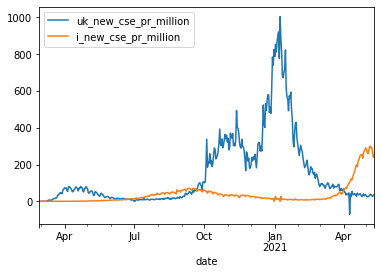

In [130]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "i_new_cse_pr_million" ])

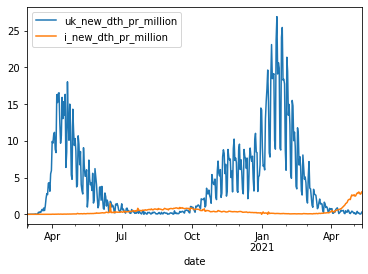

In [131]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "i_new_dth_pr_million" ])

Check for null values

In [132]:
train.isnull().sum()

iso_code                                     0
continent                                 4210
location                                     0
date                                         0
total_cases                               2481
new_cases                                 2483
new_cases_smoothed                        3484
total_deaths                             12230
new_deaths                               12072
new_deaths_smoothed                       3484
total_cases_per_million                   2941
new_cases_per_million                     2943
new_cases_smoothed_per_million            3939
total_deaths_per_million                 12677
new_deaths_per_million                   12519
new_deaths_smoothed_per_million           3939
reproduction_rate                        16980
icu_patients                             78893
icu_patients_per_million                 78893
hosp_patients                            76723
hosp_patients_per_million                76723
weekly_icu_ad

Impute missing values

In [133]:
train = train.drop(['date'], axis=1)

In [134]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [135]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [136]:
train.fillna(0,inplace=True)

Ordinal encoder

In [137]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [138]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [140]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87737,1.0
87738,0.0
87739,0.0
87740,0.0


In [141]:
X

array([[-0.47818665, -1.71121357, -0.15649802, ..., -0.26515932,
        -0.58321195,  0.94330998],
       [-0.47818665, -1.71121357, -0.15652504, ..., -0.26515932,
        -0.58321195,  1.05650284],
       [-0.47818665, -1.71121357, -0.15652504, ..., -0.26515932,
        -0.58321195,  1.1696957 ],
       ...,
       [-1.07193253,  1.72610548, -0.15638993, ..., -0.45488978,
        -0.3477391 , -0.751187  ],
       [-1.07193253,  1.72610548, -0.15614672, ..., -0.45488978,
        -0.3477391 , -0.63799414],
       [-1.07193253,  1.72610548, -0.1561197 , ..., -0.45488978,
        -0.3477391 , -0.52480128]])

Split training file up for training and validation

In [142]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((78967, 47), (8775, 47), (78967, 1), (8775, 1))

Select model

In [143]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9918683740431382


Predict on validation set

In [144]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9396702003921552
0.9997955979439678


(None, None)

In [145]:
y_val

,new_deaths
67596,0.0
27355,1744.0
21188,4.0
48635,0.0
1694,4.0
...,...
6181,2.0
77455,0.0
85366,5.0
46044,0.0


In [146]:
y_train.values

array([[0.],
       [3.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [147]:
y_pred

array([   0, 1261,    3, ...,    7,    0,   15])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


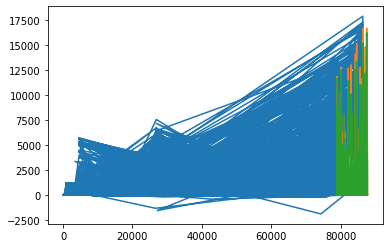

In [148]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [149]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,1744.0,1261
2,4.0,3
3,0.0,0
4,4.0,6
...,...,...
8770,2.0,0
8771,0.0,0
8772,5.0,7
8773,0.0,0


Create test dataset

In [150]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
442,AFG,Asia,Afghanistan,2021-05-12,62403.0,340.0,262.857,2710.0,12.0,8.857,1603.022,8.734,6.752,69.615,0.308,0.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,11052021
896,OWID_AFR,NaN,Africa,2021-05-12,4648116.0,7067.0,8869.000,125059.0,314.0,310.000,3467.196,5.272,6.616,93.286,0.234,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.164884e+07,15231710.0,5540571.0,254715.0,349521.0,1.61,1.14,0.41,261.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11052021
1338,ALB,Europe,Albania,2021-05-12,131803.0,50.0,68.000,2420.0,4.0,2.571,45799.917,17.374,23.629,840.920,1.390,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,11052021
1780,DZA,Africa,Algeria,2021-05-12,124483.0,195.0,212.000,3343.0,8.0,7.714,2838.769,4.447,4.835,76.235,0.182,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,11052021
2216,AND,Europe,Andorra,2021-05-12,13447.0,18.0,18.714,127.0,0.0,0.000,174037.404,232.964,242.209,1643.694,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,11052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86030,WLF,Oceania,Wallis and Futuna,2021-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.774000e+03,4286.0,1488.0,NaN,10.0,51.34,38.11,13.23,889.0,NaN,1.124600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,11052021
86506,OWID_WRL,NaN,World,2021-05-12,159690774.0,738473.0,761605.857,3317325.0,13629.0,12806.143,20486.837,94.739,97.707,425.582,1.748,1.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.345085e+09,666983330.0,327671130.0,20880198.0,21067383.0,17.26,8.56,4.20,2703.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,11052021
86903,YEM,Asia,Yemen,2021-05-12,6492.0,7.0,14.571,1276.0,1.0,5.143,217.663,0.235,0.489,42.782,0.034,0.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Convert date to number

In [151]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
442,AFG,Asia,Afghanistan,2021-05-12,62403.0,340.0,262.857,2710.0,12.0,8.857,1603.022,8.734,6.752,69.615,0.308,0.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,12052021
896,OWID_AFR,NaN,Africa,2021-05-12,4648116.0,7067.0,8869.000,125059.0,314.0,310.000,3467.196,5.272,6.616,93.286,0.234,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.164884e+07,15231710.0,5540571.0,254715.0,349521.0,1.61,1.14,0.41,261.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12052021
1338,ALB,Europe,Albania,2021-05-12,131803.0,50.0,68.000,2420.0,4.0,2.571,45799.917,17.374,23.629,840.920,1.390,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,12052021
1780,DZA,Africa,Algeria,2021-05-12,124483.0,195.0,212.000,3343.0,8.0,7.714,2838.769,4.447,4.835,76.235,0.182,0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,12052021
2216,AND,Europe,Andorra,2021-05-12,13447.0,18.0,18.714,127.0,0.0,0.000,174037.404,232.964,242.209,1643.694,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,12052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86030,WLF,Oceania,Wallis and Futuna,2021-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.774000e+03,4286.0,1488.0,NaN,10.0,51.34,38.11,13.23,889.0,NaN,1.124600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,12052021
86506,OWID_WRL,NaN,World,2021-05-12,159690774.0,738473.0,761605.857,3317325.0,13629.0,12806.143,20486.837,94.739,97.707,425.582,1.748,1.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.345085e+09,666983330.0,327671130.0,20880198.0,21067383.0,17.26,8.56,4.20,2703.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,12052021
86903,YEM,Asia,Yemen,2021-05-12,6492.0,7.0,14.571,1276.0,1.0,5.143,217.663,0.235,0.489,42.782,0.034,0.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Check for null values

In [152]:
test.isnull().sum()

iso_code                                   0
continent                                  9
location                                   0
date                                       0
total_cases                               12
new_cases                                 12
new_cases_smoothed                        12
total_deaths                              19
new_deaths                                19
new_deaths_smoothed                       12
total_cases_per_million                   13
new_cases_per_million                     13
new_cases_smoothed_per_million            13
total_deaths_per_million                  20
new_deaths_per_million                    20
new_deaths_smoothed_per_million           13
reproduction_rate                        211
icu_patients                             209
icu_patients_per_million                 209
hosp_patients                            209
hosp_patients_per_million                209
weekly_icu_admissions                    211
weekly_icu

Impute missing values

In [153]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [154]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [155]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [156]:
test.fillna(0,inplace=True)

In [157]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
442,AFG,Asia,Afghanistan,62403.0,340.0,262.857,2710.0,12.0,8.857,1603.022,8.734,6.752,69.615,0.308,0.228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.511,12052021
896,OWID_AFR,Not Listed,Africa,4648116.0,7067.0,8869.000,125059.0,314.0,310.000,3467.196,5.272,6.616,93.286,0.234,0.231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,2.164884e+07,15231710.0,5540571.0,254715.0,349521.0,1.61,1.14,0.41,261.0,0.0,1.340598e+09,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,12052021
1338,ALB,Europe,Albania,131803.0,50.0,68.000,2420.0,4.0,2.571,45799.917,17.374,23.629,840.920,1.390,0.894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.795,12052021
1780,DZA,Africa,Algeria,124483.0,195.0,212.000,3343.0,8.0,7.714,2838.769,4.447,4.835,76.235,0.182,0.176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,12052021
2216,AND,Europe,Andorra,13447.0,18.0,18.714,127.0,0.0,0.000,174037.404,232.964,242.209,1643.694,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.868,12052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86030,WLF,Oceania,Wallis and Futuna,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,5.774000e+03,4286.0,1488.0,0.0,10.0,51.34,38.11,13.23,889.0,0.0,1.124600e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,79.94,0.000,12052021
86506,OWID_WRL,Not Listed,World,159690774.0,738473.0,761605.857,3317325.0,13629.0,12806.143,20486.837,94.739,97.707,425.582,1.748,1.643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,1.345085e+09,666983330.0,327671130.0,20880198.0,21067383.0,17.26,8.56,4.20,2703.0,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,12052021
86903,YEM,Asia,Yemen,6492.0,7.0,14.571,1276.0,1.0,5.143,217.663,0.235,0.

Ordinal encoder

In [158]:
test_country = test.location
test_country

442            Afghanistan
896                 Africa
1338               Albania
1780               Algeria
2216               Andorra
               ...        
86030    Wallis and Futuna
86506                World
86903                Yemen
87323               Zambia
87741             Zimbabwe
Name: location, Length: 211, dtype: object

In [159]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [160]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [161]:
X_test = scaler.transform(X_test)

In [162]:
X_test

array([[-0.47818665, -1.71121357, -0.14733727, ..., -0.26515932,
        -0.58321195, -0.41160842],
       [ 1.303051  , -1.69573015,  0.03444557, ..., -3.94786177,
        -2.58865573, -0.41160842],
       [ 0.11555924, -1.68024673, -0.1551739 , ...,  0.51534865,
         0.53135954, -0.41160842],
       ...,
       [-0.47818665,  1.50933761, -0.15633588, ..., -0.19188018,
        -0.7441184 , -0.41160842],
       [-1.07193253,  1.52482103, -0.15544413, ..., -0.31855651,
        -0.29671998, -0.41160842],
       [-1.07193253,  1.54030445, -0.1561197 , ..., -0.45488978,
        -0.3477391 , -0.41160842]])

Predict on test set

In [163]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(211,)

Put Predictions in dataframe

In [164]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-05-12,15
1,Africa,2021-05-12,263
2,Albania,2021-05-12,1
3,Algeria,2021-05-12,0
4,Andorra,2021-05-12,0
...,...,...,...
206,Wallis and Futuna,2021-05-12,2
207,World,2021-05-12,4566
208,Yemen,2021-05-12,0
209,Zambia,2021-05-12,0
